## Описание работы:

Бизнес-задача: на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, нужно разработать метрику успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Опишите данные: <br>
1. Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно 
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(palette='tab20', n_colors=15)

Загрузка данных из csv-файлов в датафреймы, переименование столбцов для объединения

In [2]:
courses_df = pd.read_csv('Data/courses.csv', index_col='Unnamed: 0')
courses_df = courses_df.rename(columns={name: 'course_' + name for name in courses_df.columns})

students_df = pd.read_csv('Data/students.csv', usecols=['id', 'city', 'birthday'])
students_df = students_df.rename(columns={name: 'student_' + name for name in students_df.columns})

course_contents_df = pd.read_csv('Data/course_contents.csv')

progresses_df = pd.read_csv('Data/progresses.csv')
progresses_df = progresses_df.rename(columns={'id': 'progress_id'})

progress_phases_df = pd.read_csv('Data/progress_phases.csv', parse_dates=['start_date', 'finish_date'])

In [3]:
# заголовки столбцов в датасетах
print('courses_df: ', courses_df.columns)
print('course_contents_df: ', course_contents_df.columns)
print('progresses_df: ', progresses_df.columns)
print('progress_phases_df: ', progress_phases_df.columns)

courses_df:  Index(['course_id', 'course_title', 'course_field'], dtype='object')
course_contents_df:  Index(['course_id', 'module_number', 'module_title', 'lesson_number',
       'lesson_title', 'lesson_token', 'is_video', 'is_homework'],
      dtype='object')
progresses_df:  Index(['progress_id', 'student_id', 'course_id'], dtype='object')
progress_phases_df:  Index(['progress_id', 'module_number', 'lesson_number', 'status', 'start_date',
       'finish_date'],
      dtype='object')


Объединение датасетов

In [4]:
general_df = progress_phases_df.merge(progresses_df, how='inner', on='progress_id')\
                .merge(courses_df, how='inner', on='course_id')\
                .merge(course_contents_df, how='inner', on=['course_id', 'module_number', 'lesson_number'])

**Знакомимся с данными**

In [6]:
# общая информация об объединенном датасете
general_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   progress_id    350677 non-null  object             
 1   module_number  350677 non-null  int64              
 2   lesson_number  350677 non-null  int64              
 3   status         350677 non-null  object             
 4   start_date     350677 non-null  datetime64[ns, UTC]
 5   finish_date    334508 non-null  datetime64[ns, UTC]
 6   student_id     350677 non-null  object             
 7   course_id      350677 non-null  object             
 8   course_title   350677 non-null  object             
 9   course_field   350677 non-null  object             
 10  module_title   350677 non-null  object             
 11  lesson_title   350677 non-null  object             
 12  lesson_token   350677 non-null  object             
 13  is_video       350677 non-nul

В датасете есть информация по пятнадцати различным курсам:

In [7]:
# общее количество курсов в датасете
general_df['course_id'].nunique()

15

Различное количество модулей на каждом курсе: от 8 в курсе "PHP-разработчик с 0 до PRO. Часть 1" до 21 в "Анимации интерфейсов":

In [8]:
# количество модулей на каждом курсе
general_df.groupby('course_title')['module_title'].nunique().sort_values()

course_title
PHP-разработчик с 0 до PRO. Часть 1     8
Веб-вёрстка для начинающих 2.0          8
Excel Базовый                           9
Java-разработчик c нуля                 9
SMM-маркетолог от А до Я               11
Java-разработчик                       17
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Руководитель digital-проектов          17
JavaScript с нуля                      18
Интернет-маркетолог от Ingate          18
Веб-дизайн с нуля 2.0                  19
UX-дизайн                              20
Веб-разработчик                        20
Анимация интерфейсов                   21
Name: module_title, dtype: int64

In [9]:
# количество уроков в каждом модуле на каждом курсе
lessons_df = general_df.groupby(['course_title', 'module_number'])['lesson_title']\
                       .nunique()\
                       .reset_index()
                        
lessons_table = pd.pivot_table(
    lessons_df
    , values='lesson_title'
    , index=['course_title']
    , columns=['module_number']
    )
lessons_table

module_number,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
course_title,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,11.0,7.0,3.0,7.0,5.0,5.0,5.0,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Java-разработчик,8.0,8.0,9.0,9.0,7.0,6.0,5.0,7.0,7.0,8.0,...,7.0,5.0,7.0,6.0,8.0,1.0,NaN,NaN,NaN,NaN
Java-разработчик c нуля,7.0,6.0,10.0,27.0,13.0,10.0,12.0,9.0,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JavaScript с нуля,7.0,12.0,8.0,9.0,5.0,4.0,5.0,7.0,8.0,9.0,...,7.0,9.0,6.0,6.0,7.0,3.0,1.0,NaN,NaN,NaN
PHP-разработчик с 0 до PRO. Часть 1,5.0,7.0,4.0,4.0,4.0,3.0,13.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMM-маркетолог от А до Я,6.0,7.0,7.0,4.0,6.0,8.0,7.0,6.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UX-дизайн,10.0,6.0,5.0,4.0,1.0,7.0,5.0,1.0,8.0,1.0,...,1.0,4.0,3.0,2.0,1.0,1.0,1.0,6.0,1.0,NaN
Анимация интерфейсов,3.0,3.0,4.0,4.0,4.0,1.0,3.0,3.0,1.0,7.0,...,6.0,5.0,4.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0
Веб-вёрстка для начинающих 2.0,6.0,6.0,7.0,8.0,7.0,7.0,7.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


По количеству уроков в каждом модуле выделяется самый насыщенный курс "Java-разработчик с нуля". Также можно отметить курс "Интернет-маркетолог от Ingate": в нем треть модулей содержит больше 10 уроков.
Самое равномерное наполнение модулей - в курсе "Веб-разработчик".

Яснее увидеть количество уроков в модулях на различных курсах позволяет их медианное значение.
Видим, что самым насыщенным курсом остается "Java-разработчик с нуля". За ним следуют курсы "Java-разработчик", "JavaScript с нуля", "Веб-вёрстка для начинающих 2.0".

Три последних места занимают курсы:

   - "UX-дизайн" - 3,5 урока в модуле
   - "Анимация интерфейсов", "Веб-дизайн Базовый" - 3 урока в модуле
   - "Веб-разработчик" - 2 урока в модуле

In [10]:
# медианное количество уроков в модуле на каждом курсе
lessons_df.groupby('course_title')['lesson_title'].median()

course_title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                10.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lesson_title, dtype: float64

**Распределение студентов по курсам**

По количеству обучающихся наиболее востребованными являются:  
- "Интернет-маркетолог от Ingate" - 2168 студентов
- "Веб-дизайн с нуля 2.0" - 2014 студентов
- "Веб-вёрстка для начинающих 2.0" - 2004 студента.

Наименее популярны курсы:  
- "Java-разработчик c нуля" - 581 студент
- "Веб-дизайн Базовый" - 518 студентов
- "SMM-маркетолог от А до Я" - 506 студентов.  

Можно предположить, что небольшое на общем фоне количество студентов на курсе "Java-разработчик c нуля" связано с его сложностью - это самый насыщенный по количеству уроков курс.

In [11]:
# количество учеников на каждом курсе
count_student = general_df.groupby('course_title')['student_id'].nunique().sort_values()
count_student

course_title
SMM-маркетолог от А до Я                506
Веб-дизайн Базовый                      518
Java-разработчик c нуля                 581
Анимация интерфейсов                    598
Веб-разработчик                         628
Руководитель digital-проектов           685
Java-разработчик                        763
Excel Базовый                           782
PHP-разработчик с 0 до PRO. Часть 1     854
JavaScript с нуля                       966
UX-дизайн                              1151
Веб-дизайн PRO 2.0                     1711
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн с нуля 2.0                  2014
Интернет-маркетолог от Ingate          2168
Name: student_id, dtype: int64

**Посмотрим, кто учится на курсах**

Всего имеются данные по 43830 студентам. Есть большое количество пропусков по полям student_city и student_birthday:

In [12]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   student_id        43830 non-null  object
 1   student_city      13162 non-null  object
 2   student_birthday  25499 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


Посмотрим на возраст студентов. У нас есть колонка student_birthday в одном из датасетов:

In [13]:
# преобразуем формат student_birthday в datetime:
students_df['student_birthday'] = pd.to_datetime(students_df['student_birthday']
                                                 , errors='coerce')

print(students_df['student_birthday'].min())
print(students_df['student_birthday'].max())

1884-09-23 00:00:00
2199-10-07 00:00:00


Видим, что самый ранний год рождения - 1884, самый поздний - 2199. Некорректные значения в student_birthday не могут использоваться при анализе возраста студентов.  У каждого студента предполагаем наличие определенного уровня знаний и обучаемости. Поэтому отфильтровывать некорректные значения будем исходя из соображений, что реальный возраст студентов может находиться в интервале от 12 до 80 лет: уже научились ориентироваться в информационных потоках (12) и еще можно предположить адекватность восприятия и реакций (80).  
Будет логично считать возраст студента от даты выполнения первого задания start_date из progress_phases:

In [14]:
# объединяем датафреймы
all_df = general_df.merge(students_df, how='left', on='student_id')

# создаем новую колонку student_age, содержащую возраст студента в годах
all_df['student_age'] = all_df['start_date'].dt.year - all_df['student_birthday'].dt.year

С принятыми ограничениями минимальный возраст студентов - 12 лет, максимальный - 75 лет:

In [15]:
all_df[(all_df['student_age'] >= 12) & (all_df['student_age'] <= 80)]['student_age']\
            .apply(['min', 'max'])

min    12.0
max    75.0
Name: student_age, dtype: float64

Средний возраст студентов - 29.17, медианный - 28 лет:

In [16]:
# при расчете принимаем во внимание, что один студент может обучаться на разных 
# курсах, и при этом он один студент определенного возраста, а не несколько
# людей одного возраста
all_df[(all_df['student_age'] >= 12) & (all_df['student_age'] <= 80)]\
                .groupby('student_id')['student_age']\
                .median()\
                .apply(['mean', 'median'])

mean      29.174177
median    28.000000
Name: student_age, dtype: float64

Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе:

In [17]:
all_df[(all_df['student_age'] >= 12) & (all_df['student_age'] <= 80)]\
                .groupby('course_title')['student_age']\
                .agg(['max', 'min', 'mean', 'median'])

,max,min,mean,median
course_title,,,,
Excel Базовый,60.0,15.0,32.325720,32.0
Java-разработчик,63.0,13.0,28.671245,28.0
Java-разработчик c нуля,54.0,13.0,29.418427,29.0
JavaScript с нуля,58.0,13.0,27.758754,27.0
PHP-разработчик с 0 до PRO. Часть 1,73.0,13.0,30.029966,29.0
SMM-маркетолог от А до Я,51.0,16.0,28.239937,28.0
UX-дизайн,57.0,13.0,29.110053,29.0
Анимация интерфейсов,50.0,13.0,28.699267,28.0
Веб-вёрстка для начинающих 2.0,59.0,12.0,27.728385,27.0


Самым молодым курсом можно назвать "Веб-разработчик" (медианный возраст 25 лет), самым взрослым - "Excel Базовый" (медианный возраст 32 года).   
Самые старшие студенты обучаются на курсах "Веб-дизайн с нуля" (75 лет), "PHP-разработчик с 0 до PRO, Часть 1" (73 года), "Java-разработчик" (63 года). На остальных курсах максимальный возраст студентов в интервале 50-60 лет.  
С самыми молодыми студентами ситуация несколько иная: студентов в возрасте 12-13 лет нет на 5-ти курсах из 21. Минимальный возраст студентов на этих курсах - от 14 до 18 лет.

**Визуализируем** данные count_student - строим bar-chart, отражающий количество студентов на каждом курсе:

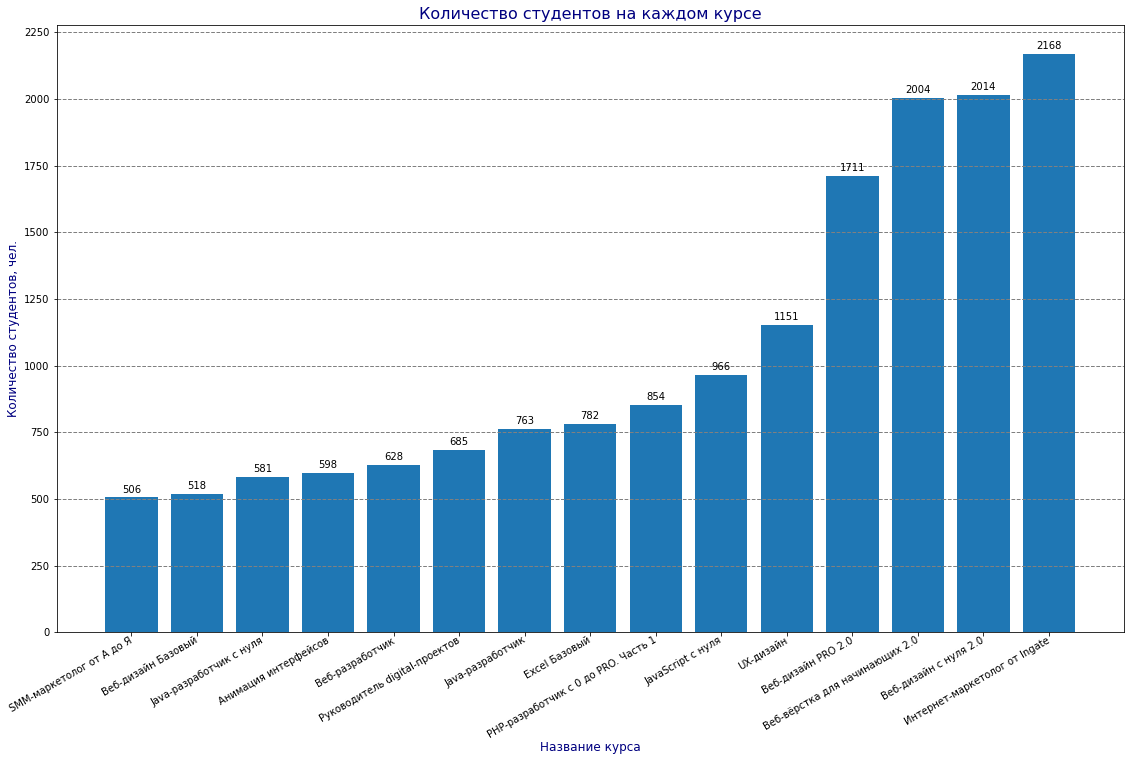

In [18]:
fig, ax = plt.subplots(figsize=(16, 10))

charts = ax.bar(count_student.index, count_student.values)
ax.set_title('Количество студентов на каждом курсе', color='navy', fontsize=16)
ax.set_xlabel('Название курса', color='navy', fontsize=12, labelpad=0.5)
ax.set_ylabel('Количество студентов, чел.', color='navy', fontsize=12)
ax.set_xticks(ticks=count_student.index)
ax.set_xticklabels(count_student.index
    , fontdict={"va": "center", "ha": "right", "rotation": 30, "wrap": True})
ax.set_yticks(list(range(0, count_student.values.max() + 100, 250)))
ax.grid(axis='y', linewidth=1, color='gray', linestyle='--')

def autolabel(charts):
    """Подписи значений на bar'ах"""
    for chart in charts:
        height = chart.get_height()
        ax.annotate('{}'.format(height),
                    xy=(chart.get_x() + chart.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(charts)

fig.tight_layout()

plt.show()

На графике видим, что выделяются 4 курса-лидера по численности студентов:  
- "Интернет-маркетолог от Ingate"
- "Веб-дизайн с нуля 2.0"
- "Веб-вёрстка для начинающих 2.0"
- "Веб-дизайн PRO 2.0".


К средней группе можно отнести:  
- "Java-разработчик"
- "Excel Базовый"
- "PHP-разработчик с 0 до PRO. Часть 1"
- "JavaScript с нуля"
- "UX-дизайн".

И 6 курсов можно отнести к небольшим:  
- "SMM-маркетолог от А до Я"
- "Веб-дизайн Базовый"
- "Java-разработчик c нуля"
- "Анимация интерфейсов"
- "Веб-разработчик"
- "Руководитель digital-проектов".

Изменим визуализацию: добавим информацию о сфере, к которой относится каждый курс.

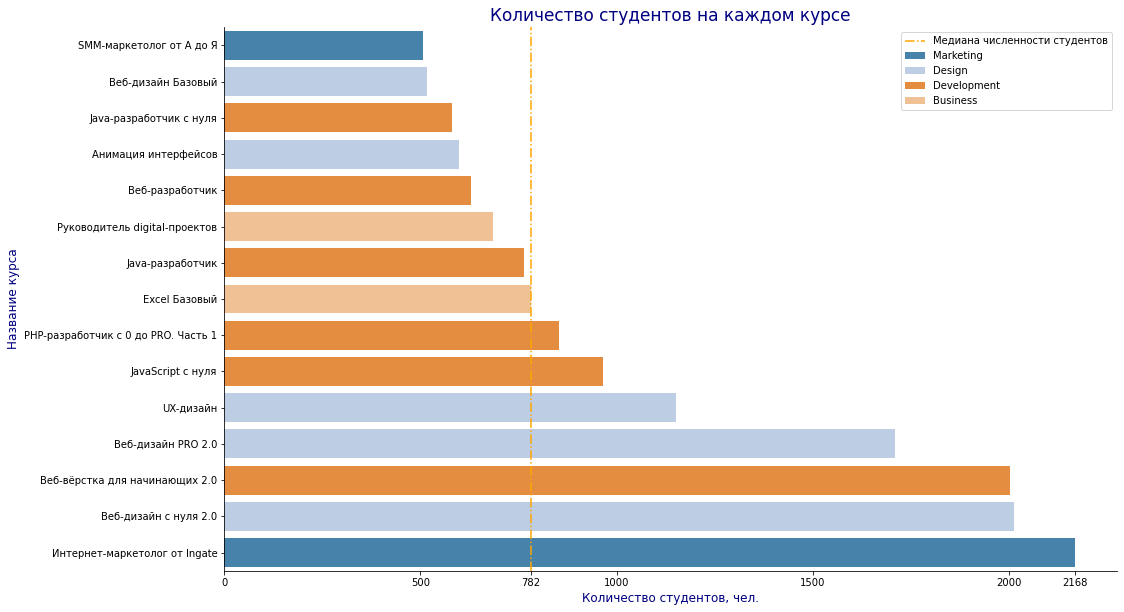

In [19]:
bahr_data = general_df\
            .groupby(['course_title', 'course_field'])['student_id']\
            .nunique()\
            .sort_values()\
            .reset_index()

fig, ax = plt.subplots(figsize=(16, 10))

plot = sns.barplot(x='student_id'
        , y='course_title'
        , data=bahr_data
        , alpha=0.9
        , hue='course_field'
        , ax=ax
        , dodge=False)

sns.despine()
ax.set_title('Количество студентов на каждом курсе', fontsize=17, color='navy')
ax.set_xlabel('Количество студентов, чел.', fontsize=12, color='navy')
ax.set_ylabel('Название курса', fontsize=12, color='navy')
ax.axvline(x = bahr_data['student_id'].median()
            , ymin=0
           , ymax=10
           , color = 'orange'
           , ls='-.'
           , label='Медиана численности студентов')
ax.legend()
xticks = list(range(0, bahr_data['student_id'].max(), 500))
xticks.append(bahr_data['student_id'].median())
xticks.append(bahr_data['student_id'].max())
ax.set_xticks(ticks=xticks)

plt.show()

По разным направлениям курсов можно отметить следующее:  
- 2 курса направления Marketing - это самый небольшой ("SMM-маркетолог от А до Я") и самый многочисленный ("Интернет-маркетолог от Ingate") курсы;
- больше всего курсов направления Development; 2 небольших по численности - это "Java-разработчик с нуля" и "Веб-разработчик", 1 близкий по численности к медианному значению - "Java-разработчик"; численность еще двух курсов превышает медианное значение - "PHP-разработчик с 0 до PRO" и "JavaScript с нуля", и один курс в лидерах (численность превышает медиану больше чем в 2 раза) - "Веб-вёрстка для начинающих 2.0";
- наибольшей популярностью пользуются курсы направления Design: 2 небольших курса - "Веб-дизайн Базовый" и "Анимация интерфейсов", - и 3 курса с численностью студентов, значительно превышающей медианное значение - "UX-дизайн", "Веб-дизайн PRO 2.0", "Веб-дизайн с нуля 2.0";
- 2 курса направления Business: "Руководитель digital-проектов" - здесь число студентов немного меньше медианы, и "Excel Базовый" - ровно медианная численность.

## 2. Расчет потенциальной нагрузки на преподавателей

1. Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 
4. Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

**Прирост количества студентов** по месяцам.   
Здесь мы рассмотрим, какое количество новых студентов приступали к обучению на каждом курсе ежемесячно.

In [20]:
general_df['counter'] = 1
general_df['start_date_ym'] = general_df['start_date'].dt.strftime('%Y-%m')

In [21]:
# определяем номера модулей и уроков, в которых размещено первое ДЗ
get_hw_df = course_contents_df[course_contents_df['is_homework'] == True]\
    .groupby(['course_id', 'module_number'])['lesson_number'].min()\
    .reset_index()\
    .groupby('course_id')\
    .agg({'module_number': 'min', 'lesson_number': 'first'})

get_hw_df

,module_number,lesson_number
course_id,,
04ba6d0b40670c43a209141fa01fa784,1,3
0770b1b039964228294f1f34b29fc2c1,1,4
17013cd19d25cb3f28dc1b2683721bb9,3,2
480d25ad36878fce09e7aada316ba1a6,1,2
6e4837f0a65c68efbfdd0594d6774701,1,8
842218e7c983795934bbe4533c0888c8,1,6
943306102e5b067d08a29094f37b8193,1,7
abce125a877c2196a3bc7bfbc11b5fc5,1,6
ac634845fb0350d0e9d49078aaa4b68f,1,11


In [22]:
student_growth_df = get_hw_df.merge(general_df
                                    , how='left'
                                    , on=['course_id', 'module_number', 'lesson_number'])\
                                    .pivot_table(index='course_title'
                            , columns='start_date_ym'
                            , values='counter'
                            , aggfunc='sum')\
                        .fillna(0)
student_growth_df

start_date_ym,2016-03,2016-11,2017-03,2017-04,2017-05,2017-06,2017-07,2018-01,2018-02,2018-03,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
course_title,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,...,30.0,33.0,43.0,52.0,46.0,63.0,46.0,45.0,43.0,28.0
Java-разработчик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,26.0,...,33.0,32.0,102.0,75.0,50.0,74.0,7.0,4.0,4.0,3.0
Java-разработчик c нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74.0,109.0,74.0,98.0,63.0
JavaScript с нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,42.0,36.0,37.0,57.0,42.0,57.0,49.0,51.0,34.0,21.0
PHP-разработчик с 0 до PRO. Часть 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,31.0,27.0,35.0,35.0,23.0,38.0,32.0,30.0,29.0,15.0
SMM-маркетолог от А до Я,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,13.0,27.0,42.0,41.0,42.0,55.0,56.0,67.0,46.0
UX-дизайн,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,61.0,61.0,...,36.0,43.0,47.0,68.0,34.0,39.0,20.0,26.0,48.0,18.0
Анимация интерфейсов,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,15.0,...,27.0,14.0,22.0,34.0,17.0,14.0,11.0,10.0,14.0,7.0
Веб-вёрстка для начинающих 2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,78.0,81.0,132.0,119.0,83.0,105.0,91.0,82.0,89.0,72.0


Период с марта 2016 года по январь 2018 включительно, очевидно, стартовый для рассматриваемых курсов: количество студентов за 23 месяца единичное, при этом только в 8-ми месяцах в этот период к обучению приступали новые студенты.
Заметный прирост начинается с февраля 2018: от 6 человек на курсе "Excel Базовый" до 76 человек на курсе "Интернет-маркетолог от Ingate". И далее во времени наблюдаем ежемесячный неотрицательный прирост, со своей спецификой на каждом курсе.

Подробнее и нагляднее ситуацию показывает визуализация:

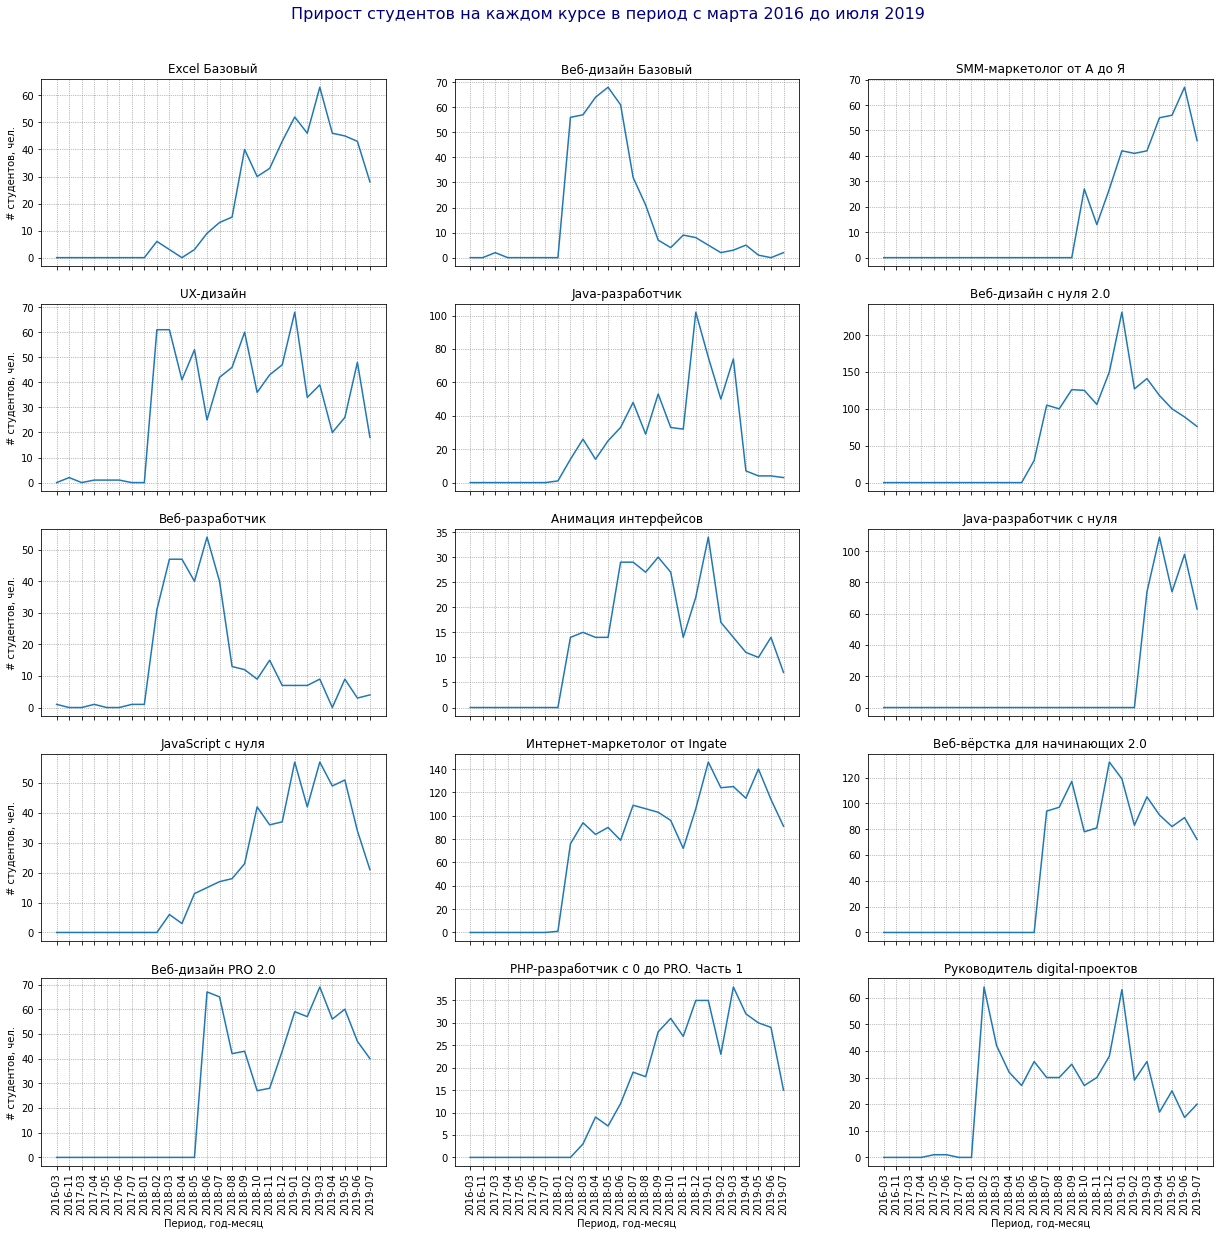

In [23]:
fig, axs = plt.subplots(nrows=5
                        , ncols=3
                        , figsize=(21, 20)
                        , sharex=True)

for j, name in enumerate(student_growth_df.index):
    data = student_growth_df[student_growth_df.index == name]
    ax = axs[j % 5][j % 3]
    ax.plot(data.columns, data.values[0])
    ax.set_title('{}'.format(name))
    if (j % 5 == 4) & (j % 3 in [0, 1, 2]):
        ax.set_xlabel('Период, год-месяц')
        ax.set_xticks(ticks=data.columns)
        ax.set_xticklabels(labels=data.columns, rotation=90)
    if (j % 3 == 0) & (0 <= j % 5 <= 4):
        ax.set_ylabel('# студентов, чел.')

    ax.grid(b=True, linewidth=0.7, linestyle=':', color='gray')   
plt.suptitle('Прирост студентов на каждом курсе в период с марта 2016 до июля 2019'
             , y=0.93
             , fontsize=16
             , color='navy')

plt.show()

Заметно позже остальных началось обучение на курсах "Java-разработчик с нуля", "SMM-маркетолог от А до Я", "Веб-вёрстка для начинающих 2.0", "Веб-дизайн с нуля 2.0" и "Веб-дизайн PRO 2.0".

По сохранению темпа прироста студентов курсы можно разделить на группы:

   - "переменные" состояния прироста, с периодом (расстоянием между пиками) 3-4 месяца: наиболее заментно в курсе "UX-дизайн", здесь же "Интернет-маркетолог от Ingate", "Веб-дизайн PRO 2.0";  
   - особняком стоит курс "SMM-маркетолог от А до Я": темп прироста увеличивается и за месяц до конца периода достигает максимума, далее примерно 15%-е снижение;
   - темп прироста значительно сокращается - до уровня "менее 10 человек в месяц" - в какой-то момент времени, и остается в таком состоянии: "Веб-дизайн Базовый" (с сентября 2018), "Java-разработчик" (с апреля 2019), "Веб-разработчик" (с декабря 2018), также сюда можно отнести курс "Анимация интерфейсов" - в последнем месяце периода прирост снижается до уровня менее 10 человек;
   - на остальных курсах темп прироста также сокращается к концу рассматриваемого периода, но в меньшей степени.

Также можно отметить, что на курсах "Excel Базовый", "Java-разработчик", "JavaScript с нуля" и "PHP-разработчик с 0 до PRO. Часть 1" темп прироста с момента начала обучения возрастает постепенно. На других курсах в начале обучения наблюдается интенсивный, где-то резкий прирост - например, "Java-разрабочик с нуля", "Веб-дизайн базовый", "Веб-разработчик", "Веб-вёрстка для начинающих 2.0".

Рассмотрим эти графики в одних координатах.

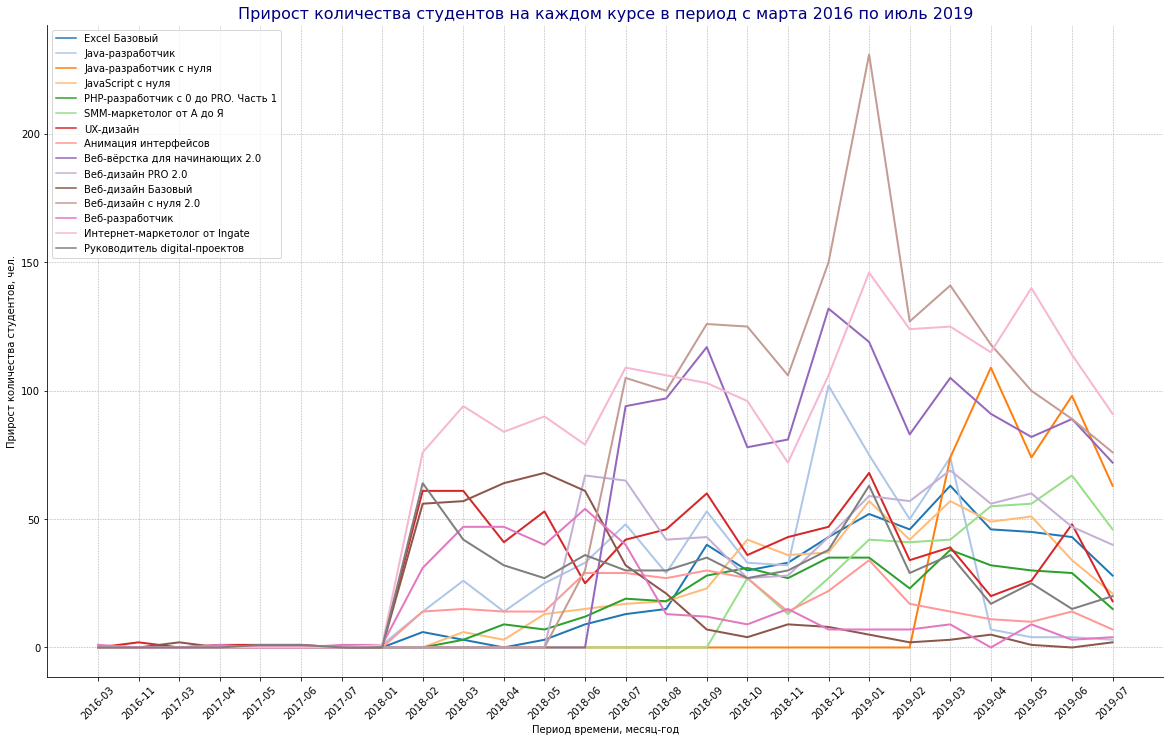

In [24]:
data = student_growth_df\
        .reset_index()\
        .melt(id_vars=['course_title'])

fig, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(data=data
             , x='start_date_ym'
             , y='value'
             , hue='course_title'
             , linewidth=2)
sns.despine()
ax.set_title('Прирост количества студентов на каждом курсе в период с марта 2016 по июль 2019'
                , color='navy'
                , fontsize=16)
ax.set_xlabel('Период времени, месяц-год')
ax.set_ylabel('Прирост количества студентов, чел.')
ax.set_xticks(ticks=list(data['start_date_ym'].unique()))
ax.set_xticklabels(labels=list(data['start_date_ym'].unique()), rotation=45)
ax.grid(b=True, linewidth=0.6, linestyle=':', color='gray')
ax.legend(loc='upper left')

plt.show()

Заметна периодичность притока студентов - между соседними пиковыми значениями проходит около 3 месяцев. Прирост заметно снижается с января 2019, исключения - курс "Веб-дизайн с нуля 2.0", там снижение идет с февраля 2019, и "Java-разработчик с нуля", прирост начинается в марте 2019.  
Наиболее интенсивный рост числа студентов наблюдается на курсах "Веб-дизайн с нуля 2.0", "Интернет-маркетолог от Ingate", "Веб-верстка для начинающих 2.0". 

Теперь рассмотрим **количество домашних работ**, ежемесячно выполняемых (**in progress**) студентами. Если студент выполнял домашнее задание на протяжении двух и более месяцев, такая работа учитывается во всех месяцах между start_date и finish_date включительно.

In [25]:
# выбираем нужные для подсчета прогрессов столбцы в отдельный 
# датафрейм меньшего размера:
hw_df = general_df[general_df['is_homework'] == True]\
                [['course_title', 'module_number', 'lesson_number','progress_id'
                , 'start_date', 'finish_date']]
hw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54478 entries, 3555 to 350673
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   course_title   54478 non-null  object             
 1   module_number  54478 non-null  int64              
 2   lesson_number  54478 non-null  int64              
 3   progress_id    54478 non-null  object             
 4   start_date     54478 non-null  datetime64[ns, UTC]
 5   finish_date    44925 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(2), object(2)
memory usage: 2.9+ MB


Есть домашние работы с датой начала и без даты окончания, их 17.5%.  
Эти строки убираем из рассмотрения: какие-то ооснованные предположения по реальному состоянию таких ДЗ для какого-то их учета построить невозможно.

In [26]:
hw_df.dropna(axis=0, how='any', subset=['finish_date'], inplace=True)

In [27]:
# для определения рабочих месяцев по каждому ДЗ вводим столбцы с месяцем (первой
# датой) начала работы над ДЗ и месяцем (первой датой), следующим за месяцем
# окончания работы над ДЗ (месяц finish_date + 1):
hw_df['range_start_date'] = hw_df['start_date'].dt.date
hw_df['range_finish_date'] = hw_df['finish_date'].dt.date + pd.DateOffset(months=1)

In [28]:
# для создания списка рабочих месяцев по каждому ДЗ запускаем date_range по 
# созданным столбцам:
def func_monthes(x, y):
    z = pd.date_range(start=x, end=y, freq='M').strftime('%Y-%m').to_list()
    return z

hw_df['working_month'] = \
            [func_monthes(hw_df['range_start_date'][i]
                , hw_df['range_finish_date'][i])\
                 for i in hw_df.index]

hw_df.head()

,course_title,module_number,lesson_number,progress_id,start_date,finish_date,range_start_date,range_finish_date,working_month
3555,Веб-дизайн PRO 2.0,1,6,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,2018-06-21,2018-07-28,[2018-06]
3556,Веб-дизайн PRO 2.0,1,6,3b9dce04f32da32763124602557f92a3,2019-03-16 15:28:29.978311+00:00,2019-03-18 09:51:16.562395+00:00,2019-03-16,2019-04-18,[2019-03]
3557,Веб-дизайн PRO 2.0,1,6,73e17a05355852fe65b785c82c37d1ad,2019-07-02 19:01:15.282595+00:00,2019-07-03 18:10:52.187797+00:00,2019-07-02,2019-08-03,[2019-07]
3558,Веб-дизайн PRO 2.0,1,6,cc3eb34ae49c719648352c4175daee88,2018-07-25 09:39:56.674653+00:00,2018-07-27 15:39:17.613950+00:00,2018-07-25,2018-08-27,[2018-07]
3559,Веб-дизайн PRO 2.0,1,6,04ace4fe130d90c801e24eea13ee808e,2019-04-24 18:11:57.823830+00:00,2019-04-25 10:11:25.756062+00:00,2019-04-24,2019-05-25,[2019-04]


In [29]:
# переводим список рабочих месяцев hw_df['working_month'] в 
# строковый формат
hw_df['working_month'] = hw_df['working_month'].str.join(',')

# отдельно фиксируем полный список рабочих месяцев
z = func_monthes(hw_df['range_start_date'].min()
                  , hw_df['range_finish_date'].max())

for month in z:
    # создаем столбцы для каждого рабочего месяца
    hw_df[month] = hw_df['working_month']
    
    # расставляем нули в ячейках, где название столбца не совпадает с рабочими 
    # месяцами по каждому ДЗ:
    hw_df[month]\
                .where(hw_df[month]\
                .str.count(month) > 0, 0, inplace=True)
    
    # расставляем единицы в ячейках, где название столбца совпадает с рабочими 
    # месяцами по каждому ДЗ:
    hw_df[month]\
                .mask(hw_df[month]\
                .str.count(month) > 0, 1, inplace=True)
hw_df.head()

,course_title,module_number,lesson_number,progress_id,start_date,finish_date,range_start_date,range_finish_date,working_month,2016-03,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
3555,Веб-дизайн PRO 2.0,1,6,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,2018-06-21,2018-07-28,2018-06,0,...,0,0,0,0,0,0,0,0,0,0
3556,Веб-дизайн PRO 2.0,1,6,3b9dce04f32da32763124602557f92a3,2019-03-16 15:28:29.978311+00:00,2019-03-18 09:51:16.562395+00:00,2019-03-16,2019-04-18,2019-03,0,...,0,0,0,0,0,1,0,0,0,0
3557,Веб-дизайн PRO 2.0,1,6,73e17a05355852fe65b785c82c37d1ad,2019-07-02 19:01:15.282595+00:00,2019-07-03 18:10:52.187797+00:00,2019-07-02,2019-08-03,2019-07,0,...,0,0,0,0,0,0,0,0,0,1
3558,Веб-дизайн PRO 2.0,1,6,cc3eb34ae49c719648352c4175daee88,2018-07-25 09:39:56.674653+00:00,2018-07-27 15:39:17.613950+00:00,2018-07-25,2018-08-27,2018-07,0,...,0,0,0,0,0,0,0,0,0,0
3559,Веб-дизайн PRO 2.0,1,6,04ace4fe130d90c801e24eea13ee808e,2019-04-24 18:11:57.823830+00:00,2019-04-25 10:11:25.756062+00:00,2019-04-24,2019-05-25,2019-04,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
# группируем по курсам и суммируем:
hw_df.groupby('course_title')[z].sum()

,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
course_title,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,0,0,0,0,0,0,0,0,0,0,...,235,229,227,335,378,340,326,289,262,157
Java-разработчик,0,0,0,0,0,0,0,0,0,0,...,240,264,377,451,483,469,287,171,108,36
Java-разработчик c нуля,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,87,480,637,949,616
JavaScript с нуля,0,0,0,0,0,0,0,0,0,0,...,158,180,201,322,344,327,335,308,315,101
PHP-разработчик с 0 до PRO. Часть 1,0,0,0,0,0,0,0,0,0,0,...,120,101,135,148,109,122,144,130,92,29
SMM-маркетолог от А до Я,0,0,0,0,0,0,0,0,0,0,...,32,60,62,84,136,134,160,159,189,127
UX-дизайн,0,0,0,0,0,0,0,0,4,2,...,303,313,297,352,367,303,243,195,210,86
Анимация интерфейсов,0,0,0,0,0,0,0,0,0,0,...,168,165,127,187,172,141,95,80,76,24
Веб-вёрстка для начинающих 2.0,0,0,0,0,0,0,0,0,0,0,...,396,441,507,577,537,532,491,408,363,141


Здесь, видимо, тестовый набор в марте 2016 на курс "Веб-разработчик". Далее, в ноябре, подключается курс "UX-дизайн". Остальные курсы в запуске с января 2018: начинается прирост студентов, появляются прогрессы по ДЗ.

Подробнее посмотрим на графиках, сначала по каждому курсу в отдельности:

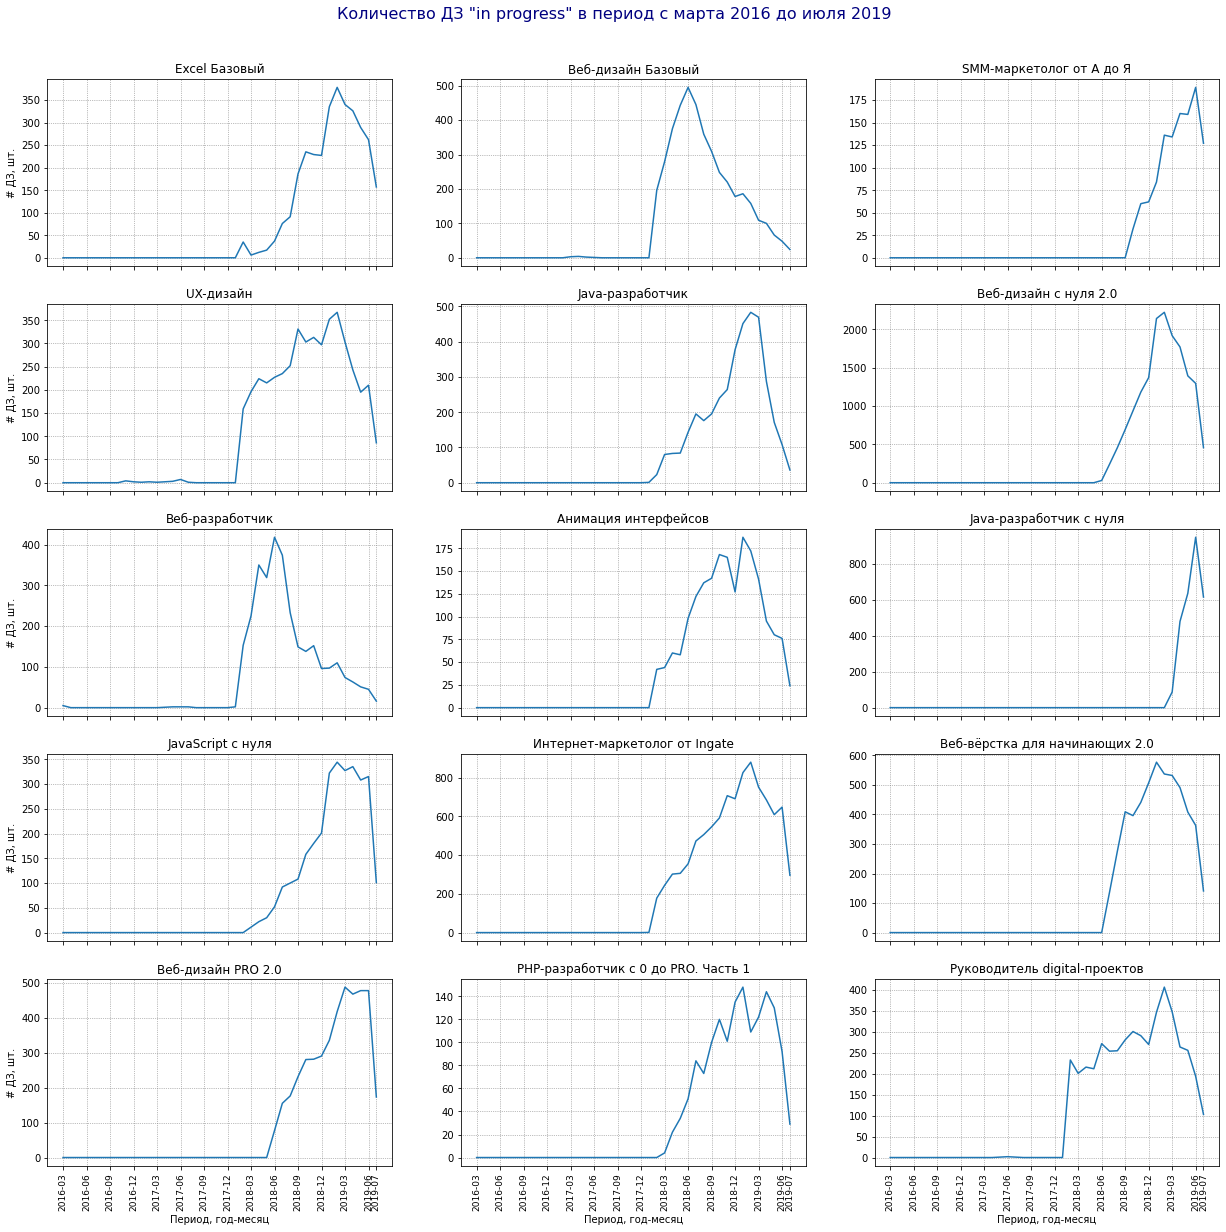

In [31]:
progress_line_df = hw_df.groupby('course_title')[z].sum()

fig, axs = plt.subplots(nrows=5
                        , ncols=3
                        , figsize=(21, 20)
                        , sharex=True)

xticks = [z[i] for i in range(0, len(z), 3)]
xticks.append(z[len(z) - 1])

for j, name in enumerate(progress_line_df.index):
    data = progress_line_df[progress_line_df.index == name]
    ax = axs[j % 5][j % 3]
    ax.plot(data.columns, data.values[0])
    ax.set_title('{}'.format(name))
    if (j % 5 == 4) & (j % 3 in [0, 1, 2]):
        ax.set_xlabel('Период, год-месяц')
        ax.set_xticks(ticks=xticks)
        ax.set_xticklabels(labels=xticks
                           , rotation=90
                           , fontsize=9)
        ax.set_xticks(ticks=xticks)
    if (j % 3 == 0) & (0 <= j % 5 <= 4):
        ax.set_ylabel('# ДЗ, шт.')
    ax.grid(linewidth=0.7, linestyle=':', color='gray')
    
plt.suptitle('Количество ДЗ "in progress" в период с марта 2016 до июля 2019'
             , y=0.93
             , fontsize=16
             , color='navy')

plt.show()

Видим, что количество ДЗ "in progress" до февраля 2018 единичное, небольшая преподавательская нагрузка есть на курсах "UX-дизайн", "Веб-дизайн Базовый", "Веб-разработчик" и "Руководитель digital-проектов".  
Серьезная преподавательская нагрузка на большинстве курсов появляется в феврале 2018, далее возрастает и вновь снижается.  
  
И сводный график по прогрессам:

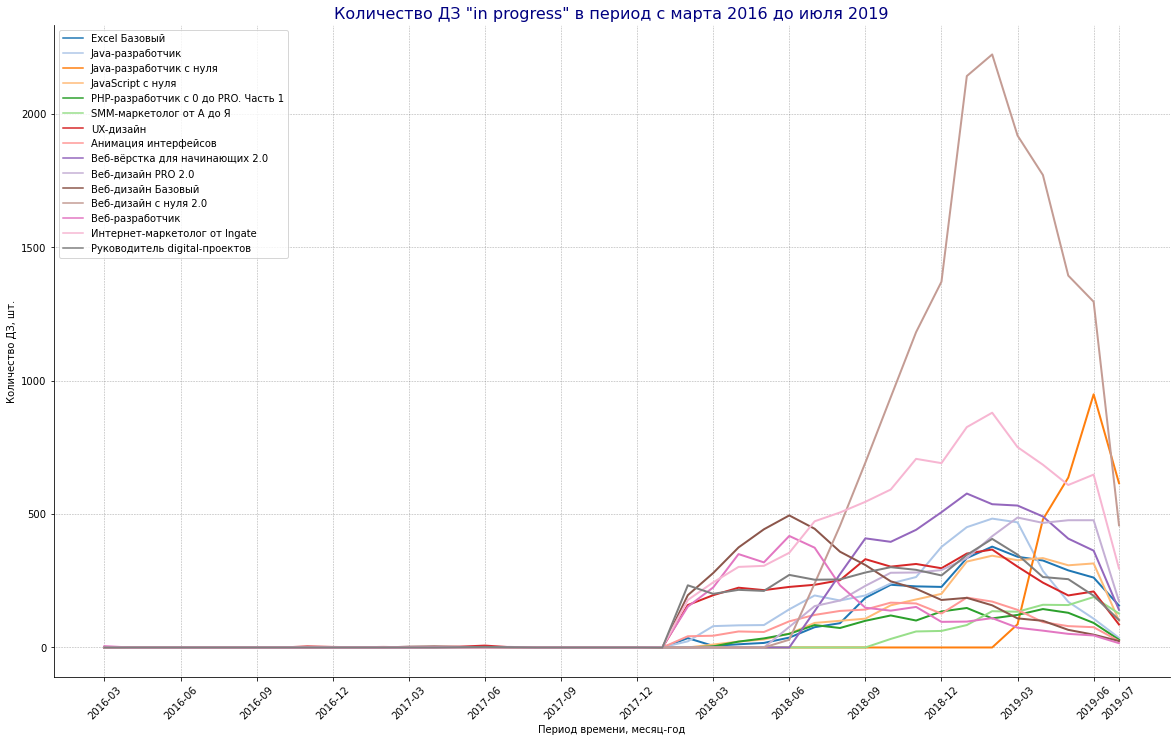

In [32]:
data_2 = progress_line_df\
        .reset_index()\
        .melt(id_vars=['course_title'])

fig, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(data=data_2
             , x='variable'
             , y='value'
             , hue='course_title'
             , linewidth=2)
sns.despine()
ax.set_title('Количество ДЗ "in progress" в период с марта 2016 до июля 2019'
                 , color='navy'
                 , fontsize=16)
ax.set_xlabel('Период времени, месяц-год')
ax.set_ylabel('Количество ДЗ, шт.')
ax.set_xticks(ticks=xticks)
ax.set_xticklabels(labels=xticks, rotation=45)
ax.grid(b=True, linewidth=0.6, linestyle=':', color='gray')
ax.legend(loc='upper left')
    
plt.show()

Явно выделяется курс "Веб-дизайн с нуля 2.0": резкий сильный рост прогрессов - с 0 до ок. 2200 - по ДЗ с июня 2018 до февраля 2019, потом резкий спад, в 4,5 раза, с февраля по июль 2019.  
Еще один курс с резким ростом количества прогрессов - "Java-разработчик с нуля", с 0 до 900+, с февраля по июнь 2019. За оставшийся месяц наблюдений - примерно 30%-й спад.  
Остальные курсы можно разделить на две группы: интенсивный рост с января 2018 - "Веб-дизайн Базовый", "Веб-разработчик", "Интернет-маркетолог от Ingate", "Руководитель digital-проектов", "UX-дизайн"; плавный рост с 1 кв. 2018 - "Анимация интерфейсов", "Java-разработчик", "JavaScript с нуля", "Excel базовый", "PHP-разработчик с 0 до PRO. Часть 1", "SMM-маркетолог то А до Я", "Веб-вёрстка для начинающих", "Веб-дизайн PRO 2.0". 
Общая тенденция по всем курсам - рост и снижение количества прогрессов. Интенсивность и темпы разные, но ни на одном курсе не наблюдается постоянного роста или постоянного сохранения одного уровня.

## 3. Выявление проблемных модулей

1. Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [33]:
# время прохождения модуля - это разница между временем начала выполнения первого
# по графику ДЗ в модуле и окончанием выполнения последнего по графику ДЗ в модуле

# определяем номер урока с первым по графику ДЗ в каждом модуле
start_hw_num = course_contents_df[course_contents_df['is_homework'] == True]\
    .groupby(['course_id', 'module_number'])['lesson_number']\
    .min()\
    .reset_index()\
    .rename(columns={'min': 'lesson_number'})

# определяем номер урока с последним по графику ДЗ в каждом модуле
finish_hw_num = course_contents_df[course_contents_df['is_homework'] == True]\
    .groupby(['course_id', 'module_number'])['lesson_number']\
    .max()\
    .reset_index()\
    .rename(columns={'max': 'lesson_number'})

# выбираем из general_df время начала выполнения первого по графику ДЗ в модуле
_1 = general_df[['course_id', 'course_title', 'module_number', 'progress_id', 'start_date', 'lesson_number']]
start_hw_df = start_hw_num.merge(_1, how='left', on=['course_id', 'module_number', 'lesson_number'])

# выбираем из general_df время окончания выполнения последнего по графику ДЗ в модуле
_2 = general_df[['course_id', 'course_title', 'module_number', 'progress_id', 'finish_date', 'lesson_number']]
finish_hw_df = finish_hw_num.merge(_2, how='left', on=['course_id', 'module_number', 'lesson_number'])

# объединяем время начала прохождения модуля и время окончания
module_time_df = start_hw_df[['course_id', 'course_title', 'module_number', 'progress_id', 'start_date']]\
    .merge(finish_hw_df[['course_id', 'course_title', 'module_number', 'progress_id', 'finish_date']]
           , how='left'
           , on=['course_id', 'course_title', 'module_number', 'progress_id'])

module_time_df.head()

,course_id,course_title,module_number,progress_id,start_date,finish_date
0,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,81fb8b7412a483355d02d32987aaba6e,2018-07-07 10:13:37.089749+00:00,NaT
1,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,225784e4b9c1b3dcefc486f1e27f946b,2019-01-16 18:12:11.942899+00:00,NaT
2,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,c29cf5d7f832d3e82f99a118223eb729,2018-09-01 11:41:39.358335+00:00,2018-09-05 04:09:11.431596+00:00
3,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,b431e4ed2a994d9a8435553c52967ffe,2018-09-25 13:22:30.172231+00:00,2018-09-25 18:19:33.176841+00:00
4,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,1,611adeffa3b1c685f061d84bb34a4c16,2019-02-12 14:01:28.652737+00:00,2019-02-13 19:35:00.740491+00:00


In [34]:
# есть прогрессы с неоконченными модулями, т. е. без finish_date; убираем такие
module_time_df.dropna(inplace=True)

In [35]:
module_time_df['hwork_time'] = module_time_df['finish_date'] - module_time_df['start_date']

# минимальное время прохождения каждого модуля
module_time_df.groupby(['course_title', 'module_number'])['hwork_time']\
        .min()\
        .reset_index()\
        .pivot_table(index='course_title', columns='module_number', aggfunc='first')

hwork_time  \
module_number                                             1    
course_title                                                   
Excel Базовый                       -1 days +23:59:59.999725   
Java-разработчик                    -1 days +23:59:59.999542   
Java-разработчик c нуля               0 days 00:17:34.635001   
JavaScript с нуля                   -1 days +23:59:59.999601   
PHP-разработчик с 0 до PRO. Часть 1 -1 days +23:59:59.999519   
SMM-маркетолог от А до Я            -1 days +23:59:59.999758   
UX-дизайн                           -1 days +23:59:59.999742   
Анимация интерфейсов                  0 days 00:00:00.003280   
Веб-вёрстка для начинающих 2.0      -1 days +23:59:59.999648   
Веб-дизайн PRO 2.0                  -1 days +23:59:59.999696   
Веб-дизайн Базовый                                       NaT   
Веб-дизайн с нуля 2.0               -1 days +23:59:59.999536   
Веб-разработчик                     -1 days +23:59:59.999438   
Интернет-маркетолог от Ingate       -1 days +23:59:59.999562   
Руководитель digital-проектов       -1 days +23:59:59.999669   

                                                              \
module_number                                             2    
course_title                                                   
Excel Базовый                       -1 days +23:59:59.999707   
Java-разработчик                    -1 days +23:59:59.997688   
Java-разработчик c нуля               0 days 00:02:57.852415   
JavaScript с нуля                   -1 days +23:59:59.999730   
PHP-разработчик с 0 до PRO. Часть 1 -1 days +23:59:59.999625   
SMM-маркетолог от А до Я            -1 days +23:59:59.999637   
UX-дизайн                           -1 days +23:59:59.999712   
Анимация интерфейсов                  0 days 00:00:00.002524   
Веб-вёрстка для начинающих 2.0      -1 days +23:59:59.999670   
Веб-дизайн PRO 2.0                  -1 days +23:59:59.999666   
Веб-дизайн Базовый                                       NaT   
Веб-дизайн с нуля 2.0                                    NaT   
Веб-разработчик                     -1 days +23:59:59.999587   
Интернет-маркетолог от Ingate       -1 days +23:59:59.999612   
Руководитель digital-проектов       -1 days +23:59:59.999631   

                                                              \
module_number                                             3    
course_title                                                   
Excel Базовый                       -1 days +23:59:59.999765   
Java-разработчик                    -1 days +23:59:59.999619   
Java-разработчик c нуля               0 days 00:00:51.278113   
JavaScript с нуля                   -1 days +23:59:59.999757   
PHP-разработчик с 0 до PRO. Часть 1   0 days 03:11:32.195806   
SMM-маркетолог от А до Я            -1 days +23:59:59.999737   
UX-дизайн                           -1 days +23:59:59.999713   
Анимация интерфейсов                  0 days 00:00:00.001772   
Веб-вёрстка для начинающих 2.0      -1 days +23:59:59.999764   
Веб-дизайн PRO 2.0                                       NaT   
Веб-дизайн Базовый                  -1 days +23:59:59.999602   
Веб-дизайн с нуля 2.0               -1 days +23:59:59.999764   
Веб-разработчик                     -1 days +23:59:59.999697   
Интернет-маркетолог от Ingate       -1 days +23:59:59.999520   
Руководитель digital-проектов       -1 days +23:59:59.999720   

                                                              \
module_number                                             4    
course_title                                                   
Excel Базовый                       -1 days +23:59:59.999748   
Java-разработчик                    -1 days +23:59:59.999513   
Java-разработчик c нуля               0 days 02:45:54.401324   
JavaScript с нуля                   -1 days +23:59:59.999726   
PHP-разработчик с 0 до PRO. Часть 1 -1 days +23:59:59.999731   
SMM-маркетолог от А до Я              1 days 00:41:53.039755   
UX-дизайн      

Здесь отметим 3 момента:  
1. Есть необходимость избавиться от отрицательного времени (здесь finish_date меньше start_date - это может быть ошибкой или какими-то особенностями учета / фиксирования дат или работ);   
2. Есть необходимость избавиться от нулевого времени: например, в курсе "Анимация интерфейсов" минимальное время прохождения модуля - микросекунды. Определим нижнюю границу минимального времеми выполнения ДЗ на уровне 5 минут: будем исходить из того, что сложность заданий и уровень подготовки студентов может быть разным.
3. Минимальное время удобнее рассматривать в часах.

In [36]:
labels = module_time_df[module_time_df['start_date'] > module_time_df['finish_date']].index
module_time_df.drop(labels=labels, axis=0, inplace=True)

In [37]:
def hours(x):
    """Перевод секунд в строку ЧЧ:ММ:СС"""
    h = int(x // 3600)
    m = int((x % 3600) // 60)
    s = int(x % 60)
    mm = str(m // 10) + str(m % 10)
    ss = str(s // 10) + str(s % 10)
    res = str('{}:{}:{}'.format(h, mm, ss))
    return res

module_time_df['hwork_sec'] = module_time_df['hwork_time'].dt.total_seconds()
module_time_df['hwork_day'] = module_time_df['hwork_time'].dt.days
module_time_df[module_time_df['hwork_time'] > pd.Timedelta(minutes=5)]\
        .groupby(['course_title', 'module_number'])['hwork_sec']\
        .min()\
        .apply(hours)\
        .reset_index()\
        .pivot_table(index='course_title', columns='module_number', aggfunc='first')

hwork_sec                                 \
module_number                              1         2         3          4    
course_title                                                                   
Excel Базовый                         0:52:49   0:53:46   0:28:21    1:45:43   
Java-разработчик                      0:27:10  12:31:25   8:57:54   10:57:53   
Java-разработчик c нуля               0:17:34   5:17:55  16:13:56    2:45:54   
JavaScript с нуля                     0:38:48   2:58:54   1:02:35    5:50:00   
PHP-разработчик с 0 до PRO. Часть 1   0:18:13  17:46:10   3:11:32  127:21:24   
SMM-маркетолог от А до Я              6:12:22   4:14:55  46:08:12   24:41:53   
UX-дизайн                             0:29:11   0:12:40   2:28:46   20:06:46   
Анимация интерфейсов                  1:08:51   2:03:41   3:20:50    3:00:11   
Веб-вёрстка для начинающих 2.0        0:09:18   6:44:15  19:17:46   21:10:42   
Веб-дизайн PRO 2.0                    0:05:14  46:04:04       NaN   25:22:34   
Веб-дизайн Базовый                        NaN       NaN   3:44:19        NaN   
Веб-дизайн с нуля 2.0                 3:31:31       NaN   3:05:47    0:14:42   
Веб-разработчик                       0:22:23   0:31:48   1:30:47    0:25:05   
Интернет-маркетолог от Ingate         0:48:47   4:15:52   2:02:26    1:11:58   
Руководитель digital-проектов         1:45:56   1:46:21   1:00:29    8:52:37   

                                                                               \
module_number                              5         6          7          8    
course_title                                                                    
Excel Базовый                         1:22:41   1:03:09    3:08:28    3:03:51   
Java-разработчик                     14:32:43   0:16:39   16:45:59   19:24:58   
Java-разработчик c нуля               0:06:07   0:52:29   36:45:07  124:12:29   
JavaScript с нуля                     1:34:23   6:34:43   13:23:07    9:44:12   
PHP-разработчик с 0 до PRO. Часть 1  97:35:08  52:40:54  113:16:38  606:39:06   
SMM-маркетолог от А до Я             31:37:00   5:22:22        NaN    5:10:27   
UX-дизайн                                 NaN  14:29:09   13:01:41        NaN   
Анимация интерфейсов                 17:52:08       NaN   20:43:56   20:40:38   
Веб-вёрстка для начинающих 2.0       31:40:18  38:34:06   25:49:00   44:31:43   
Веб-дизайн PRO 2.0                    5:00:59   2:51:16   18:30:37        NaN   
Веб-дизайн Базовый                    0:55:42  13:24:51    2:09:12    4:37:30   
Веб-дизайн с нуля 2.0                 0:05:27       NaN    0:21:29        NaN   
Веб-разработчик                       1:48:10   4:55:02    0:56:37    1:44:30   
Интернет-маркетолог от Ingate         0:37:24  18:51:09    2:50:53   14:08:08   
Руководитель digital-проектов         1:30:13   0:50:09    0:13:48    2:20:48   

                                                          ...            \
module_number                               9         10  ...        12   
course_title                                              ...             
Excel Базовый                         16:26:41       NaN  ...       NaN   
Java-разработчик                       3:54:47   1:01:48  ...  79:27:33   
Java-разработчик c нуля              250:57:32       NaN  ...       NaN   
JavaScript с нуля                      1:39:50   2:22:16  ...  17:42:55   
PHP-разработчик с 0 до PRO. Часть 1        NaN       NaN  ...       NaN   
SMM-маркетолог от А до Я                   NaN       NaN  ...       NaN   
UX-дизайн                            495:43:12       NaN  ...       NaN   
Анимация интерфейсов                       NaN   5:32:40  ...       NaN   
Веб-вёрстка для начинающих 2.0             NaN       NaN  ...       NaN   
Веб-дизайн PRO 2.0                     1:55:11   2:34:04  ...   2:31:38   
Веб-дизайн Базовый                    13:24:52   5:59:38  ...   6:40:48   
Веб-дизайн с нуля 2.0                  1:35:55   0:07:18  ...   0:21:02   
Веб-разрабо

Минимальное прохождение модуля на разных курсах колеблется от 5 минут до 783 часов (32 дня).  
Можно выделить курсы:  
- "Excel Базовый" - здесь минимальное время меньше в сравнении с другими курсами;
- "Веб-разработчик", "UX-дизайн", "PHP-разработчик с 0 до PRO. Часть 1", "JavaScript с нуля", "Java-разработчик c нуля", "Java-разработчик" - здесь минимальное время прохождения отдельных можулей превышает 10 дней.

Максимальное время удобнее рассматривать в днях:

In [38]:
# максимальное время прохождения каждого модуля
module_time_df.groupby(['course_title', 'module_number'])['hwork_day']\
        .max()\
        .reset_index()\
        .pivot_table(index='course_title', columns='module_number', aggfunc='first')

hwork_day                              \
module_number                              1      2      3      4      5    
course_title                                                                
Excel Базовый                           183.0  184.0   89.0  327.0  175.0   
Java-разработчик                        269.0  377.0  475.0  484.0  197.0   
Java-разработчик c нуля                 106.0   84.0   96.0   71.0   62.0   
JavaScript с нуля                       352.0  193.0  167.0  131.0  131.0   
PHP-разработчик с 0 до PRO. Часть 1     284.0  316.0  223.0  143.0  231.0   
SMM-маркетолог от А до Я                209.0   89.0  102.0   29.0   20.0   
UX-дизайн                               375.0  366.0  355.0  389.0    NaN   
Анимация интерфейсов                    259.0  291.0  319.0  173.0  160.0   
Веб-вёрстка для начинающих 2.0          312.0  259.0  289.0  289.0  287.0   
Веб-дизайн PRO 2.0                      363.0  274.0    NaN  298.0  201.0   
Веб-дизайн Базовый                        NaN    NaN  308.0    NaN  108.0   
Веб-дизайн с нуля 2.0                   333.0    NaN  200.0  269.0  168.0   
Веб-разработчик                         144.0  227.0  205.0  344.0  218.0   
Интернет-маркетолог от Ingate           444.0  464.0  377.0  142.0  162.0   
Руководитель digital-проектов           245.0  350.0  396.0  444.0  402.0   

                                                                        ...  \
module_number                           6      7      8      9      10  ...   
course_title                                                            ...   
Excel Базовый                         77.0  174.0  239.0  156.0    NaN  ...   
Java-разработчик                     309.0   99.0  133.0  133.0   64.0  ...   
Java-разработчик c нуля               37.0   33.0   22.0   14.0    NaN  ...   
JavaScript с нуля                    256.0  175.0  200.0  243.0   97.0  ...   
PHP-разработчик с 0 до PRO. Часть 1  187.0  142.0  187.0    NaN    NaN  ...   
SMM-маркетолог от А до Я             159.0    NaN   62.0    NaN    NaN  ...   
UX-дизайн                            305.0  288.0    NaN  284.0    NaN  ...   
Анимация интерфейсов                   NaN  127.0  143.0    NaN   98.0  ...   
Веб-вёрстка для начинающих 2.0       235.0  211.0  216.0    NaN    NaN  ...   
Веб-дизайн PRO 2.0                   174.0  209.0    NaN   78.0  100.0  ...   
Веб-дизайн Базовый                   366.0  375.0  308.0  377.0  144.0  ...   
Веб-дизайн с нуля 2.0                  NaN  143.0    NaN  162.0  152.0  ...   
Веб-разработчик                      304.0  313.0  211.0  108.0  145.0  ...   
Интернет-маркетолог от Ingate        344.0  249.0  343.0  342.0  342.0  ...   
Руководитель digital-проектов        142.0  457.0  352.0  163.0  159.0  ...   

                                                                               \
module_number                           12     13     14     15     16     17   
course_title                                                                    
Excel Базовый                          NaN    NaN    NaN    NaN    NaN    NaN   
Java-разработчик                     132.0  172.0   81.0   29.0    NaN   94.0   
Java-разработчик c нуля                NaN    NaN    NaN    NaN    NaN    NaN   
JavaScript с нуля                     33.0  124.0  127.0   88.0  107.0    NaN   
PHP-разработчик с 0 до PRO. Часть 1    NaN    NaN    NaN    NaN    NaN    NaN   
SMM-маркетолог от А до Я               NaN    NaN    NaN    NaN    NaN    NaN   
UX-дизайн                              NaN  300.0    NaN    NaN    NaN    NaN   
Анимация интерфейсов                   NaN  307.0  335.0  334.0    NaN    NaN   
Веб-вёрстка для начинающих 2.0         NaN    NaN    NaN    NaN    NaN    NaN   
Веб-дизайн PRO 2.0                   145.0  111.0  102.0  132.0   22.0    NaN   
Веб-дизайн Базовый                   169.0  147.0  333.0    NaN    NaN  425.0   
Веб-дизайн с нуля 2.0                200.0  185.0  130.0  149.0  108.0  104.0   
Веб-разрабо

Максимальное время прохождения модуля - от двух недель до 1 года 4-х месяцев. Это экстремальные значения, они показывают скорее тот срок, после которого можно не ожидать продолжения обучения от студента.  
В целом значительно меньше остальных эти значения на курсе "Java-разработчик c нуля". По каким-то причинам студенты на этом курсе быстрее справляются с домашними заданиями в модулях; возможно, чем-то отличается курс (проще материал, удачнее структура, опытнее преподаватели) или студенты (выше мотивация, есть предварительная подготовка).  

In [39]:
# среднее время прохождения каждого модуля, в днях
module_time_df[module_time_df['hwork_time'] > pd.Timedelta(minutes=5)]\
        .groupby(['course_title', 'module_number'])['hwork_day']\
        .mean()\
        .reset_index()\
        .pivot_table(index='course_title', columns='module_number', aggfunc='first')

hwork_day                        \
module_number                               1          2          3    
course_title                                                           
Excel Базовый                         5.515419   3.805970   2.890339   
Java-разработчик                      9.386404  17.497630  23.472414   
Java-разработчик c нуля               9.208481   7.545455  10.583893   
JavaScript с нуля                    12.276382  18.874510  10.488479   
PHP-разработчик с 0 до PRO. Часть 1   7.915584  29.885714  24.688000   
SMM-маркетолог от А до Я             14.376271  18.017442  16.636364   
UX-дизайн                            18.724382  14.174636  18.336658   
Анимация интерфейсов                 11.362319  15.986175  33.503497   
Веб-вёрстка для начинающих 2.0       10.042711  13.821078  32.187364   
Веб-дизайн PRO 2.0                   18.671642  36.470948        NaN   
Веб-дизайн Базовый                         NaN        NaN  16.586510   
Веб-дизайн с нуля 2.0                15.622600        NaN  11.325371   
Веб-разработчик                       6.026490  12.356061  10.394958   
Интернет-маркетолог от Ingate         9.803934  30.358470  28.225225   
Руководитель digital-проектов         5.398907  24.997260  17.373887   

                                                                      \
module_number                               4          5          6    
course_title                                                           
Excel Базовый                        10.515050   6.921053   4.628692   
Java-разработчик                     19.508772  20.279762  12.716129   
Java-разработчик c нуля              15.963636  14.533333  13.250000   
JavaScript с нуля                    13.192090  17.062069  15.940678   
PHP-разработчик с 0 до PRO. Часть 1  31.873418  32.563380  25.648148   
SMM-маркетолог от А до Я              8.000000   6.555556  19.125000   
UX-дизайн                            28.650000        NaN  22.896947   
Анимация интерфейсов                 17.550847  16.708333        NaN   
Веб-вёрстка для начинающих 2.0       31.864662  37.354430  28.128205   
Веб-дизайн PRO 2.0                   31.560784  14.184549  14.092784   
Веб-дизайн Базовый                         NaN   8.189103  26.041199   
Веб-дизайн с нуля 2.0                13.343039   8.003945        NaN   
Веб-разработчик                      12.335000  12.370892  21.702703   
Интернет-маркетолог от Ingate         8.171904  13.568445  28.821293   
Руководитель digital-проектов        41.138889  17.579710  10.837696   

                                                                      \
module_number                               7          8          9    
course_title                                                           
Excel Базовый                         9.615385   9.215470  18.098901   
Java-разработчик                     10.328467  20.574257  32.043478   
Java-разработчик c нуля               8.189189  12.470588  12.000000   
JavaScript с нуля                    20.368932  14.076087  13.731707   
PHP-разработчик с 0 до PRO. Часть 1  51.416667  97.700000        NaN   
SMM-маркетолог от А до Я                   NaN  13.311111        NaN   
UX-дизайн                            28.775120        NaN  77.814815   
Анимация интерфейсов                 23.500000  30.652174        NaN   
Веб-вёрстка для начинающих 2.0       23.935484  30.791667        NaN   
Веб-дизайн PRO 2.0                   18.017751        NaN   9.474074   
Веб-дизайн Базовый                   17.185654  21.904110  18.703518   
Веб-дизайн с нуля 2.0                 6.970244        NaN  13.857673   
Веб-разработчик                      18.861789  15.825243  12.741573   
Интернет-маркетолог от Ingate         8.736264  17.230047  18.255556   
Руководитель digital-проектов        25.595890  27.865079   7.603306   

                                                ...                        \
module_number                               10  ...         12       

Средние значения времени прохождения модуля в основном в промежутке от 5 дней до месяца. 

In [40]:
# медианное время прохождения каждого модуля, в днях
module_time_df[module_time_df['hwork_time'] > pd.Timedelta(minutes=5)]\
        .groupby(['course_title', 'module_number'])['hwork_day']\
        .median()\
        .reset_index()\
        .pivot_table(index='course_title', columns='module_number', aggfunc='first')

hwork_day                                \
module_number                              1     2     3     4     5     6    
course_title                                                                  
Excel Базовый                             2.0   1.0   1.0   3.0   3.0   2.0   
Java-разработчик                          3.0   7.0   9.0   7.5   8.0   6.0   
Java-разработчик c нуля                   3.0   3.0   6.0  11.0  11.0  11.0   
JavaScript с нуля                         3.0   9.0   5.0   8.0  10.0   8.0   
PHP-разработчик с 0 до PRO. Часть 1       1.0  14.0  14.0  21.0  21.0  17.0   
SMM-маркетолог от А до Я                  7.0  12.0  11.0   6.0   5.0  11.0   
UX-дизайн                                 4.0   5.0   7.0  13.0   NaN  11.0   
Анимация интерфейсов                      1.0   4.0   7.0   8.0   6.0   NaN   
Веб-вёрстка для начинающих 2.0            3.0   7.0  18.0  18.0  24.0  18.0   
Веб-дизайн PRO 2.0                        5.0  22.0   NaN  18.0   6.0   6.5   
Веб-дизайн Базовый                        NaN   NaN   6.0   NaN   5.0  13.0   
Веб-дизайн с нуля 2.0                     6.0   NaN   6.0   7.0   4.0   NaN   
Веб-разработчик                           1.0   2.0   3.0   2.0   2.0   8.0   
Интернет-маркетолог от Ingate             2.0  12.0  13.0   4.0   6.0  15.0   
Руководитель digital-проектов             2.0   9.0   7.0  23.0   6.0   4.0   

                                                             ...              \
module_number                          7     8     9     10  ...    12    13   
course_title                                                 ...               
Excel Базовый                         4.0   2.0  10.0   NaN  ...   NaN   NaN   
Java-разработчик                      6.0  13.0  24.0   7.0  ...  25.0  18.0   
Java-разработчик c нуля               6.0  11.0  12.0   NaN  ...   NaN   NaN   
JavaScript с нуля                    11.0   5.5   5.0   5.0  ...   5.0   2.0   
PHP-разработчик с 0 до PRO. Часть 1  37.0  89.0   NaN   NaN  ...   NaN   NaN   
SMM-маркетолог от А до Я              NaN  10.0   NaN   NaN  ...   NaN   NaN   
UX-дизайн                            14.0   NaN  54.0   NaN  ...   NaN  63.0   
Анимация интерфейсов                 12.5  19.5   NaN   6.0  ...   NaN  11.0   
Веб-вёрстка для начинающих 2.0       14.0  22.0   NaN   NaN  ...   NaN   NaN   
Веб-дизайн PRO 2.0                    9.0   NaN   6.0   7.0  ...   4.0   9.5   
Веб-дизайн Базовый                    8.0  10.0   8.0  13.0  ...  13.0   9.0   
Веб-дизайн с нуля 2.0                 3.0   NaN   8.0   6.0  ...   6.0   4.0   
Веб-разработчик                       5.0   6.0   4.0   6.0  ...   8.5   8.0   
Интернет-маркетолог от Ingate         3.0  10.0   9.0   6.0  ...  13.5  13.5   
Руководитель digital-проектов         9.0  12.0   4.0   8.0  ...   7.5  13.0   

                                                                          \
module_number                          14    15    16    17     18    19   
course_title                                                               
Excel Базовый                         NaN   NaN   NaN   NaN    NaN   NaN   
Java-разработчик                     12.0  11.0   NaN  26.5    NaN   NaN   
Java-разработчик c нуля               NaN   NaN   NaN   NaN    NaN   NaN   
JavaScript с нуля                     6.0  11.5  16.5   NaN   41.0   NaN   
PHP-разработчик с 0 до PRO. Часть 1   NaN   NaN   NaN   NaN    NaN   NaN   
SMM-маркетолог от А до Я              NaN   NaN   NaN   NaN    NaN   NaN   
UX-дизайн                             NaN   NaN   NaN   NaN    NaN   5.5   
Анимация интерфейсов                  6.0  14.0   NaN   NaN   26.5   NaN   
Веб-вёрстка для начинающих 2.0        NaN   NaN   NaN   NaN    NaN   NaN   
Веб-дизайн PRO 2.0                    7.0  12.0   2.0   NaN    NaN   NaN   
Веб-дизайн Базовый                   25.0   NaN   NaN  62.5    NaN   NaN   
Веб-дизайн с нуля 2.0                 4.0   8.0   3.0   2.0    2.0  14.0   
Веб-разработчик                 

Более показательны медианные значения:  
- меньше всего времени на прохождение модулей студенты тратят на курсе "Excel Базовый";
- наиболее затратны по времени курсы "PHP-разработчик с 0 до PRO. Часть 1", "Веб-вёрстка для начинающих 2.0", "UX-дизайн".

Рассмотрим графики изменения медианного времени прохождения модулей:

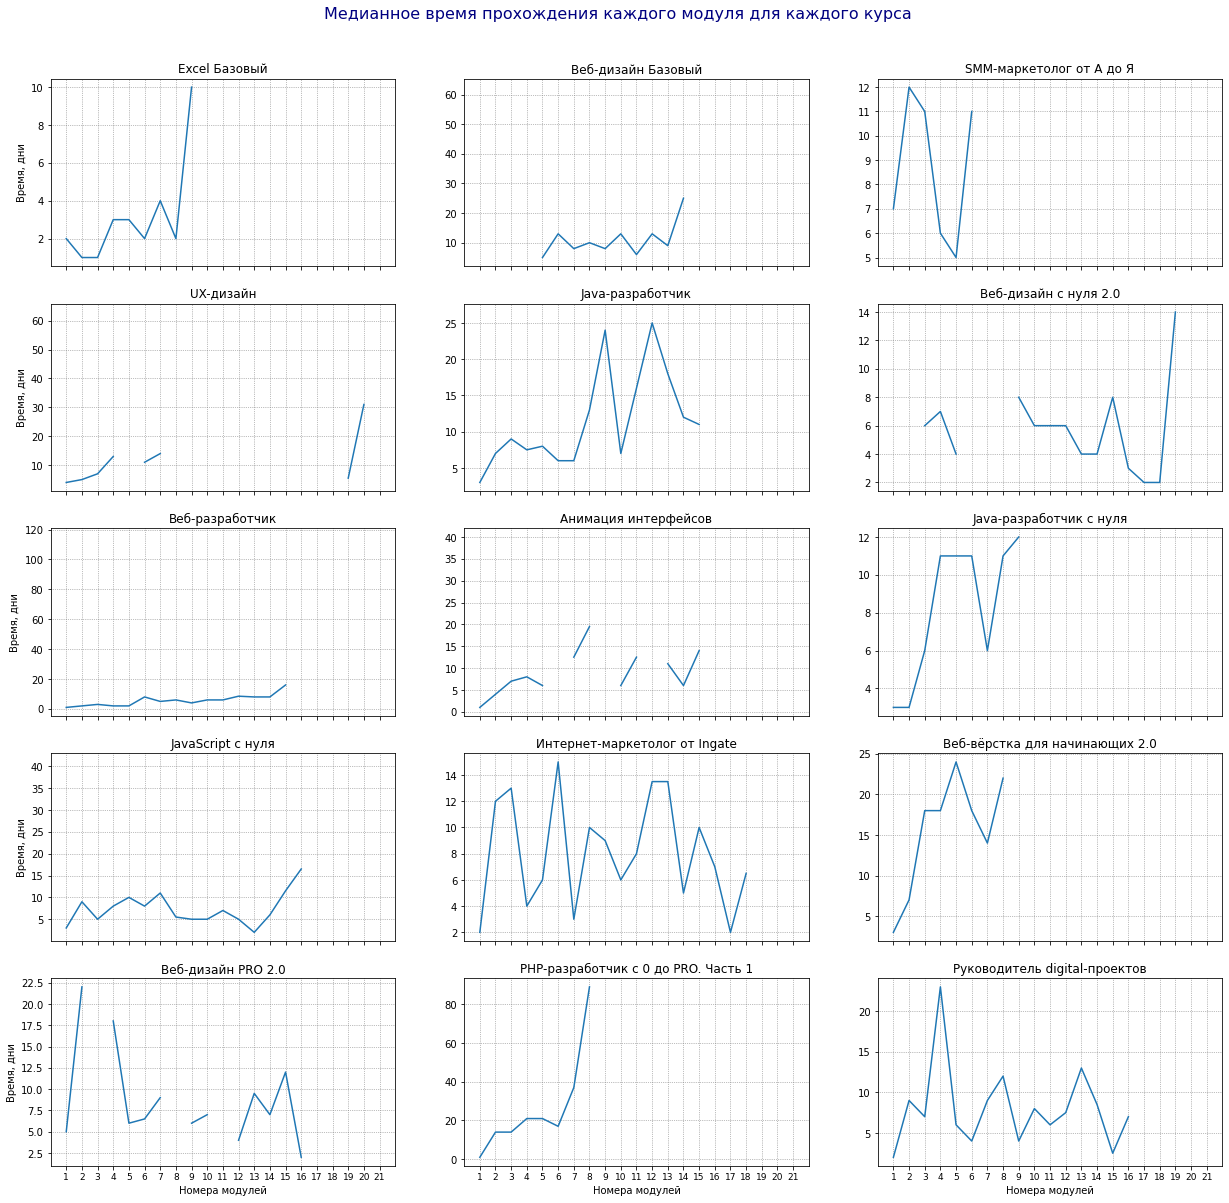

In [41]:
median_time_df = module_time_df[module_time_df['hwork_time'] > pd.Timedelta(minutes=5)]\
        .groupby(['course_title', 'module_number'])['hwork_day']\
        .median()\
        .reset_index()\
        .pivot_table(index='course_title', columns='module_number', aggfunc='first')
median_time_df.columns = list(range(1, 22))

fig, axs = plt.subplots(nrows=5
                        , ncols=3
                        , figsize=(21, 20)
                        , sharex=True)

xticks = median_time_df.columns

for j, name in enumerate(median_time_df.index):
    data = median_time_df[median_time_df.index == name]
    ax = axs[j % 5][j % 3]
    ax.plot(data.columns, data.values[0])
    ax.set_title('{}'.format(name))
    if (j % 5 == 4) & (j % 3 in [0, 1, 2]):
        ax.set_xlabel('Номера модулей')
        ax.set_xticks(ticks=xticks)
        ax.set_xticklabels(labels=xticks
                           , fontsize=9) 
    if (j % 3 == 0) & (0 <= j % 5 <= 4):
        ax.set_ylabel('Время, дни')
    ax.grid(linewidth=0.7, linestyle=':', color='gray')
    
plt.suptitle('Медианное время прохождения каждого модуля для каждого курса'
             , y=0.93
             , fontsize=16
             , color='navy')

plt.show()

1. Курсы, в которых на последний модуль затрачивается значительно больше времени, чем на предыдущие:
- "Excel Базовый", "Веб-дизайн Базовый", "UX-дизайн", "Веб-дизайн с нуля 2.0", "JavaScript с нуля", "PHP-разработчик с 0 до PRO. Часть 1";  
2. Во время прохождения модулей наблюдаются значительные колебания сроков выполнения ДЗ на курсах:
- "SMM-маркетолог от А до Я", "Java-разработчик", "Анимация интерфейсов", "Java-разработчик с нуля", "Интернет-маркетолог от Ingate", "Веб-вёрстка для начинающих 2.0", "Веб-дизайн PRO 2.0", "Руководитель digital-объектов".

**Смотрим на сезонность выполнения домашних работ по курсам**

In [42]:
# возвращаемся к датафрейму hw_df: он содержит данные о прогрессах по урокам с ДЗ, незавершенные ДЗ отфильтрованы
hw_df.head()

,course_title,module_number,lesson_number,progress_id,start_date,finish_date,range_start_date,range_finish_date,working_month,2016-03,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
3555,Веб-дизайн PRO 2.0,1,6,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,2018-06-21,2018-07-28,2018-06,0,...,0,0,0,0,0,0,0,0,0,0
3556,Веб-дизайн PRO 2.0,1,6,3b9dce04f32da32763124602557f92a3,2019-03-16 15:28:29.978311+00:00,2019-03-18 09:51:16.562395+00:00,2019-03-16,2019-04-18,2019-03,0,...,0,0,0,0,0,1,0,0,0,0
3557,Веб-дизайн PRO 2.0,1,6,73e17a05355852fe65b785c82c37d1ad,2019-07-02 19:01:15.282595+00:00,2019-07-03 18:10:52.187797+00:00,2019-07-02,2019-08-03,2019-07,0,...,0,0,0,0,0,0,0,0,0,1
3558,Веб-дизайн PRO 2.0,1,6,cc3eb34ae49c719648352c4175daee88,2018-07-25 09:39:56.674653+00:00,2018-07-27 15:39:17.613950+00:00,2018-07-25,2018-08-27,2018-07,0,...,0,0,0,0,0,0,0,0,0,0
3559,Веб-дизайн PRO 2.0,1,6,04ace4fe130d90c801e24eea13ee808e,2019-04-24 18:11:57.823830+00:00,2019-04-25 10:11:25.756062+00:00,2019-04-24,2019-05-25,2019-04,0,...,0,0,0,0,0,0,1,0,0,0


Рассмотрим медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.  
Определим для каждого месяца медианное время выполнения работ, которые были начаты в этом месяце. 

In [43]:
season_df = hw_df.loc[:, 'course_title':'finish_date']
season_df['hwork_time'] = (season_df['finish_date'] - season_df['start_date']).dt.days
season_df['start_month'] = season_df['start_date'].dt.month_name()

seasons = ['January', 'February', 'March', 'April'
           , 'May', 'June', 'July', 'August'
           , 'September', 'October', 'November', 'December']
new_columns = pd.MultiIndex.from_tuples(list(zip(['hwork_time'] * 12, seasons)))

season_table = season_df.groupby(['course_title', 'start_month'])['hwork_time']\
    .median()\
    .reset_index()\
    .pivot_table(index='course_title', columns='start_month', aggfunc='first')\
    .reindex(columns=new_columns)

season_table

hwork_time                             \
                                       January February March April   May   
course_title                                                                
Excel Базовый                              2.0      2.0   2.0   1.0   2.0   
Java-разработчик                           5.0      4.0   6.5   9.0   9.0   
Java-разработчик c нуля                    NaN      NaN   6.0   3.0   3.0   
JavaScript с нуля                          6.0      5.0   5.5   4.0   5.0   
PHP-разработчик с 0 до PRO. Часть 1       11.0      7.5   9.5  10.0   8.0   
SMM-маркетолог от А до Я                  12.0      9.0  11.0   8.0  10.0   
UX-дизайн                                  9.0      4.0   9.0   8.0   8.0   
Анимация интерфейсов                       6.0      2.5   7.0   5.0   6.0   
Веб-вёрстка для начинающих 2.0             9.0      8.5   8.0   9.0   8.0   
Веб-дизайн PRO 2.0                        10.0      8.0   7.0   6.5   5.0   
Веб-дизайн Базовый                         8.0      0.0  12.0   8.0   6.0   
Веб-дизайн с нуля 2.0                      5.0      6.0   4.0   4.0   4.0   
Веб-разработчик                            6.0      3.0  11.0   3.0   2.0   
Интернет-маркетолог от Ingate              5.0      3.5   6.0   7.0   7.0   
Руководитель digital-проектов              5.0      1.0   6.0   6.0   6.0   

                                                                        \
                                    June July August September October   
course_title                                                             
Excel Базовый                        1.0  1.0    3.0       1.5     2.0   
Java-разработчик                     7.0  6.0   14.0      11.0     9.0   
Java-разработчик c нуля              2.0  1.0    NaN       NaN     NaN   
JavaScript с нуля                    5.0  5.0    7.0      11.0    12.0   
PHP-разработчик с 0 до PRO. Часть 1  8.0  6.0   13.5       9.5    23.0   
SMM-маркетолог от А до Я             7.0  4.0    NaN       NaN    17.5   
UX-дизайн                            6.0  6.0    9.5      11.0    13.0   
Анимация интерфейсов                 4.0  5.0    3.0       7.0     5.0   
Веб-вёрстка для начинающих 2.0       5.0  3.0    7.0      10.0    11.0   
Веб-дизайн PRO 2.0                   4.0  8.0   31.0      27.0    14.5   
Веб-дизайн Базовый                   7.0  7.0   12.0      13.0    18.0   
Веб-дизайн с нуля 2.0                3.0  3.0    7.0       8.0     7.0   
Веб-разработчик                      1.0  2.0    4.0       7.0     8.0   
Интернет-маркетолог от Ingate        5.0  4.0    7.0       4.0     7.0   
Руководитель digital-проектов        6.0  6.0   13.0      10.0     4.0   

                                                       
                                    November December  
course_title                                           
Excel Базовый                            2.0      4.0  
Java-разработчик                         8.0      3.0  
Java-разработчик c нуля                  NaN      NaN  
JavaScript с нуля                        8.0      8.0  
PHP-разработчик с 0 до PRO. Часть 1     19.0      8.0  
SMM-маркетолог от А до Я                16.0     24.0  
UX-дизайн                               10.0     10.0  
Анимация интерфейсов                     8.0     11.0  
Веб-вёрстка для начинающих 2.0           9.0      8.0  
Веб-дизайн PRO 2.0                      10.0     10.0  
Веб-дизайн Базовый                       7.5     18.0  
Веб-дизайн с нуля 2.0                    7.0      7.0  
Веб-разработчик                          5.0      8.0  
Интернет-маркетолог от Ingate            6.0      5.0  
Руководитель digital-проектов            5.5      7.0

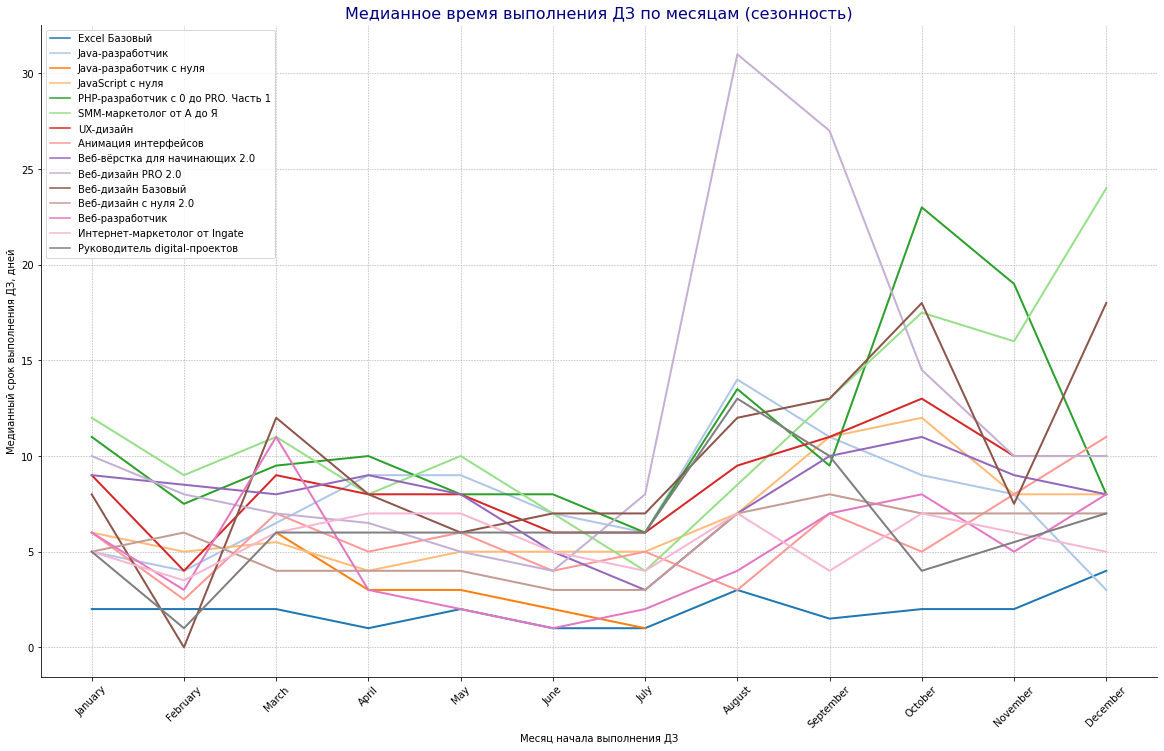

In [44]:
data_3 = season_table\
        .reset_index()\
        .melt(id_vars=['course_title'])

fig, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(data=data_3
             , x='variable_1'
             , y='value'
             , hue='course_title'
             , linewidth=2)
sns.despine()
ax.set_title('Медианное время выполнения ДЗ по месяцам (сезонность)'
                 , color='navy'
                 , fontsize=16)
ax.set_xlabel('Месяц начала выполнения ДЗ')
ax.set_ylabel('Медианный срок выполнения ДЗ, дней')
ax.set_xticks(ticks=seasons)
ax.set_xticklabels(labels=seasons, rotation=45)
ax.grid(b=True, linewidth=0.6, linestyle=':', color='gray')
ax.legend(loc='upper left')
    
plt.show()

На общем графике выделяются 2 курса. Наибольший рост (с 8 до 31 дня) показывает в августе курс "Веб-дизайн PRO 2.0", затем идет сокращение до 10 дней в декабре. Курс "PHP-разработчик с 0 до PRO. Часть 1": в августе начинается рост медианного времени выполнения ДЗ, в октябре зафиксирован максимум, 23 дня, далее - снижение до 8 дней в декабре.  


Медианное время выполнения ДЗ на всех курсах начинает расти в августе, и на большинстве курсов продолжается до декабря. ДЗ с наименьшим медианным временем выполнения начинаются в июле, июне и мае.  
  

## 4. Расчет конверсии

1. Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно 
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [45]:
# возвращаемся к start_hw_df и finish_hw_df, в них содержатся строки только по первому и последнему ДЗ в каждом модуле 
_3 = start_hw_df[['course_id', 'course_title', 'module_number', 'progress_id', 'start_date']]\
    .merge(finish_hw_df[['course_id', 'course_title', 'module_number', 'progress_id', 'finish_date']]
           , how='left'
           , on=['course_id', 'course_title', 'module_number', 'progress_id'])

In [46]:
# определяем количество начатых и законченных прогрессов по каджому модулю
_4 = _3.groupby(['course_id', 'course_title', 'module_number'])\
        [['progress_id', 'start_date', 'finish_date']]\
        .count()\
        .reset_index()
_4['conversion'] = _4['start_date'] / _4['finish_date'].shift(periods=1, axis=0) * 100
_4.describe()

,module_number,progress_id,start_date,finish_date,conversion
count,191.000000,191.000000,191.000000,191.000000,190.000000
mean,8.214660,276.256545,276.256545,226.198953,inf
std,5.051419,305.715076,305.715076,260.508354,NaN
min,1.000000,3.000000,3.000000,0.000000,8.571429
25%,4.000000,76.000000,76.000000,63.000000,98.008752
50%,7.000000,183.000000,183.000000,143.000000,100.000000
75%,12.000000,351.500000,351.500000,280.500000,105.482456
max,21.000000,1871.000000,1871.000000,1637.000000,inf


In [47]:
# в каждом модуле, с которого начинаются ДЗ в курсе, значение конверсии должно отсутствовать - нет предыдущего модуля
# и количества окончивших его студентов; эти строки убираем
# также проверим, есть ли модули, которые не закончил ни один студент, и тоже их уберем
delete_str = start_hw_num.groupby(['course_id'])['module_number']\
        .min()\
        .reset_index()             
delete_str.insert(2, 'delete', 'del')

conversion_df = _4.merge(delete_str, how='left', on=['course_id', 'module_number'])

In [48]:
indexes = list(conversion_df[conversion_df['delete'] == 'del'].index) + \
            list(conversion_df[conversion_df['finish_date'] == 0].index + 1)
conversion_df.drop(labels=indexes, inplace=True)

In [49]:
conversion_df.describe()

,module_number,progress_id,start_date,finish_date,conversion
count,175.000000,175.000000,175.000000,175.000000,175.000000
mean,8.794286,239.577143,239.577143,195.285714,103.477705
std,4.800978,255.058870,255.058870,215.935757,35.989297
min,2.000000,3.000000,3.000000,0.000000,8.571429
25%,5.000000,74.500000,74.500000,60.000000,97.513228
50%,8.000000,162.000000,162.000000,122.000000,100.000000
75%,12.500000,287.000000,287.000000,242.000000,103.318449
max,21.000000,1494.000000,1494.000000,1216.000000,505.555556


Видим, что есть показатели конверсии больше 100%. Значит, что к выполнению следующего модуля приступает больше студентов, чем заканчивает предыдущий. Это может быть связано с тем, что часть студентов выполняют домашние задания не последовательно, одно за другим, а переходя к следующим до того, как закончили предыдущее.  

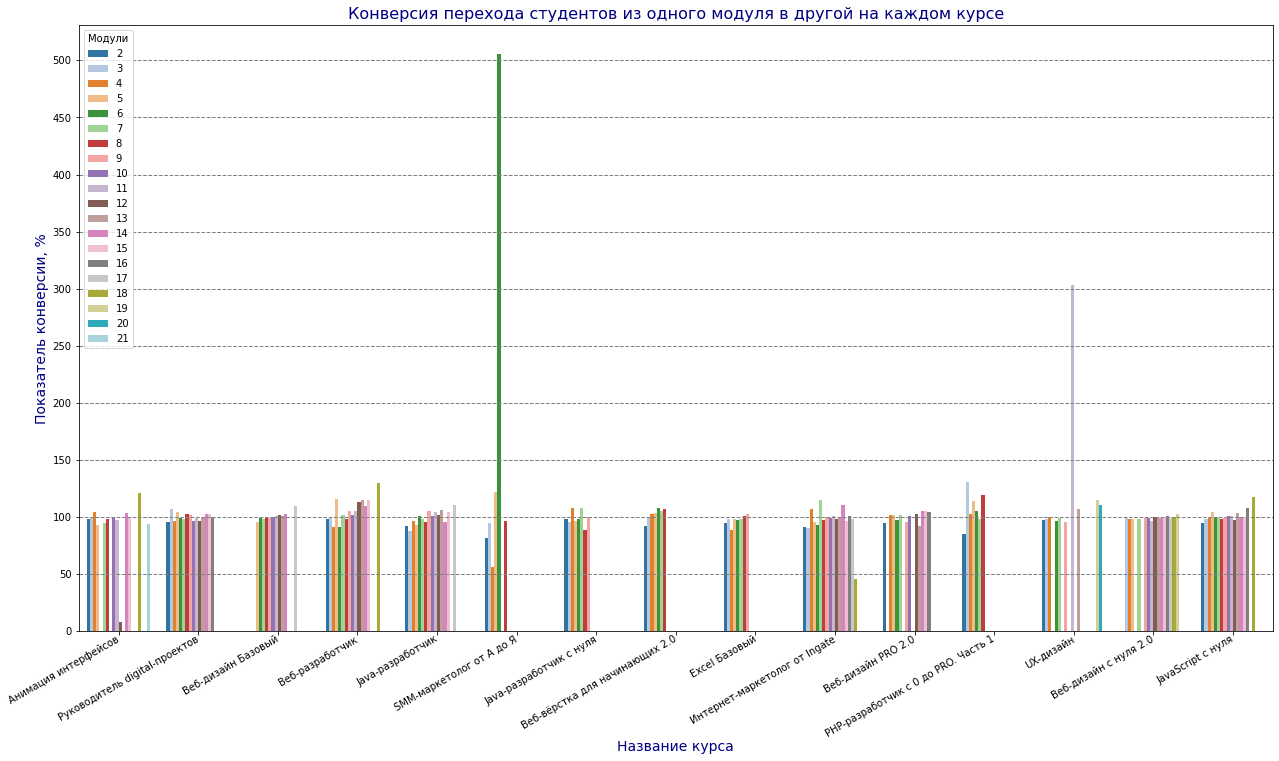

In [50]:
fig, ax = plt.subplots(figsize=(18, 10))

ax = sns.barplot(x='course_title'
                    , y='conversion'
                    , hue='module_number'
                    , data=conversion_df
                    , palette='tab20')

ax.set_title('Конверсия перехода студентов из одного модуля в другой на каждом курсе', color='navy', fontsize=16)
ax.set_xlabel('Название курса', color='navy', fontsize=14, labelpad=0.5)
ax.set_ylabel('Показатель конверсии, %', color='navy', fontsize=14)
ax.set_xticklabels(
    conversion_df['course_title'].unique()
    , fontdict={"va": "center", "ha": "right", "rotation": 30, "wrap": True})
ax.set_yticks(np.linspace(0, 500, 11))
ax.grid(axis='y', linewidth=1, color='gray', linestyle='--')
ax.legend(title='Модули', loc='upper left')

fig.tight_layout()

plt.show()

Наиболее выдающиеся значения конверсии - в модулях 6, курс "SMM-маркетолог от А до Я", и 11, курс "UX-дизайн".  
Вероятно, эти модули выполняют в том числе те студенты, которые не выполняют все (или почти все) остальные модули в этих курсах.  
Проверим:

In [103]:
# progress_id с начатыми заданиями модулей 6 и 11 курсов "SMM-маркетолог от А до Я" и "UX-дизайн" соответственно
progress_mod_6 = _3[(_3['course_title'] == 'SMM-маркетолог от А до Я') & (_3['module_number'] == 6)]\
                ['progress_id'].values
progress_mod_11 = _3[(_3['course_title'] == 'UX-дизайн') & (_3['module_number'] == 11)]\
                ['progress_id'].values

# progress_id с начатыми заданиями по остальным модулям курсов "SMM-маркетолог от А до Я" и "UX-дизайн"
progress_SMM = _3[(_3['course_title'] == 'SMM-маркетолог от А до Я') & (_3['module_number'] != 6)]\
                ['progress_id'].values
progress_UX = _3[(_3['course_title'] == 'UX-дизайн') & (_3['module_number'] != 11)]\
                ['progress_id'].values

In [116]:
# прогрессы, общие для модуля 6 и других модулей курса "SMM-маркетолог от А до Я"
# прогрессы, общие для модуля 11 и других модулей курса "UX-дизайн"
comm_mod_6 = list(set(progress_mod_6) & set(progress_SMM))
comm_mod_11 = list(set(progress_mod_11) & set(progress_UX))

# сравнительное количество уникальных для модулей 6 и 11 прогрессов
print('Уникальных прогрессов в 6-м модуле курса \'SMM-маркетолог от А до Я\': ', len(progress_SMM) - len(comm_mod_6))
print('Всего прогрессов в курсе \'SMM-маркетолог от А до Я\': ', len(progress_SMM))
print('Уникальных прогрессов в 11-м модуле курса \'UX-дизайн\': ', len(progress_UX) - len(comm_mod_11))
print('Всего прогрессов в курсе \'UX-дизайн\': ', len(progress_UX))

Уникальных прогрессов в 6-м модуле курса 'SMM-маркетолог от А до Я':  881
Всего прогрессов в курсе 'SMM-маркетолог от А до Я':  972
Уникальных прогрессов в 11-м модуле курса 'UX-дизайн':  3012
Всего прогрессов в курсе 'UX-дизайн':  3109


Посмотрим на **показатели конверсии с учетом направлений курсов**:

In [51]:
_6 = conversion_df.merge(course_contents_df
                                         , how='left'
                                         , on=['course_id', 'module_number'])
diff_conversion_df = _6.merge(courses_df, how='left', on=['course_id', 'course_title'])
diff_conversion_df['module_name'] = diff_conversion_df['module_number'].astype(str)\
        .str.cat(diff_conversion_df['module_title'], sep =' - ')

In [70]:
colors = ['greenyellow', 'khaki', 'violet', 'aquamarine']
# словарь соответствий направлений курсов и цветов
d = dict.fromkeys(courses_df['course_field'].unique())
for i, k in enumerate(d):
    d[k] = colors[i]
    
# словарь соответствий курсов и направлений курсов    
dc = dict(list(zip(courses_df['course_title'], courses_df['course_field'])))

# словарь соответствий курсов и цветов
wdc = dc.copy()
for y in wdc:
    wdc[y] = d[wdc[y]]

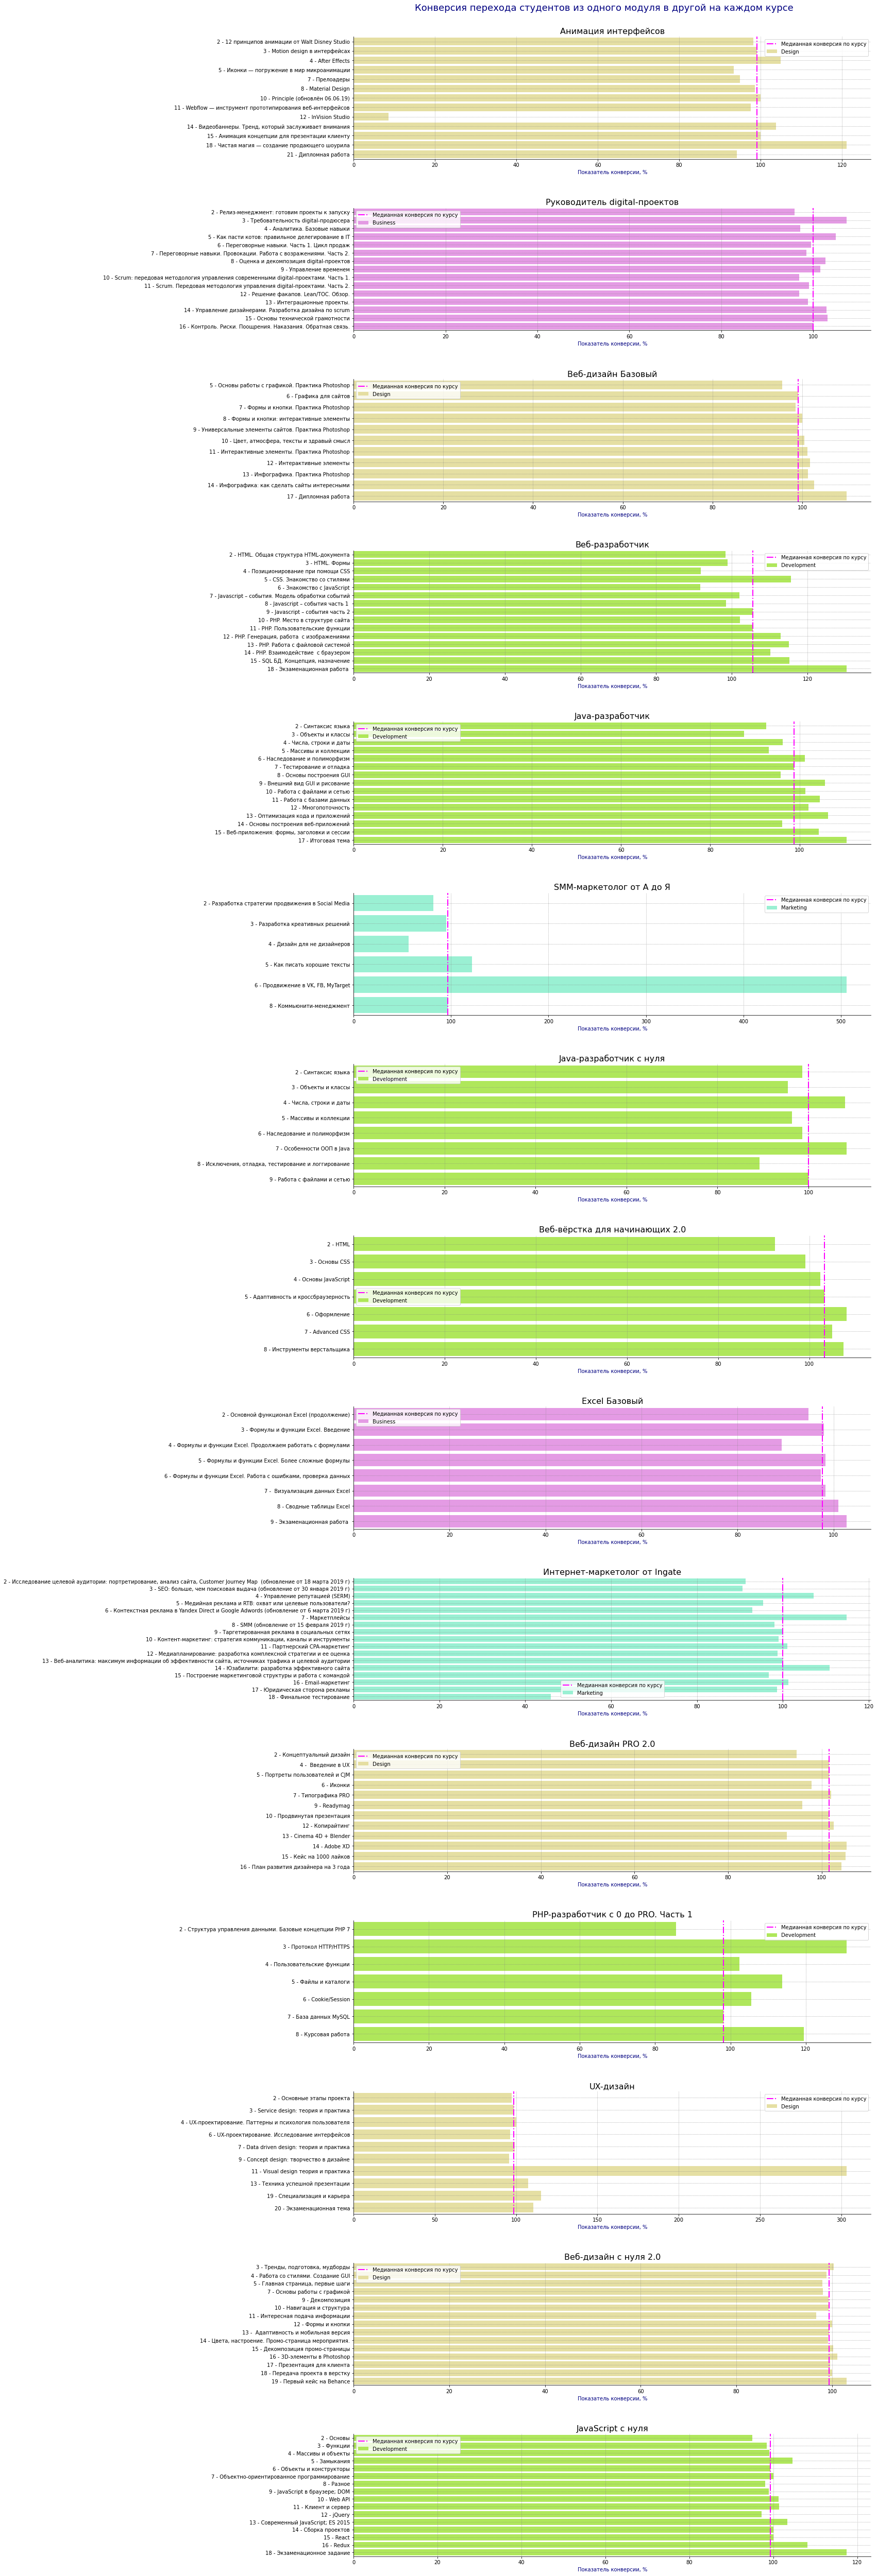

In [76]:
fig, axs = plt.subplots(nrows=15
                        , ncols=1
                        , figsize=(18, 90))

for j, name in enumerate(diff_conversion_df['course_title'].unique()):
    data = diff_conversion_df[diff_conversion_df['course_title'] == name]
    axs[j] = sns.barplot(x='conversion'
                , y='module_name'
                , data=data
                , ax=axs[j]
                , alpha=0.9
                , color=wdc[name]
                , label=dc[name])
    
    sns.despine()
    
    axs[j].set_title('{}'.format(name), fontsize=16)
    axs[j].set_xlabel('Показатель конверсии, %', color='navy')
    axs[j].set_ylabel(None)
        
    axs[j].axvline(x=data['conversion'].median()
               , ymin=0
               , c='magenta'
               , linewidth=2
               , ls='-.'
               , label='Медианная конверсия по курсу')
    
    axs[j].legend(loc='best', title=None)
    axs[j].grid(linewidth=0.7, linestyle=':', color='gray')   
    
plt.suptitle('Конверсия перехода студентов из одного модуля в другой на каждом курсе'
             , y=0.89
             , fontsize=18
             , color='navy')

plt.subplots_adjust(hspace=0.4)

plt.show()

График медианы в графиках выше находится в некоторой окрестности значения 100%.  
Чем ближе медиана к показателю конверсии 100%, тем более дисциплинирован курс, тем большей частью студентов выполняются ДЗ в каждом модуле и тем больше студентов из числа начавших курс его завершили.  

К наиболее дисциплинированным курсам можно отнести:  
- "Руководитель digital-проектов"
- "Java-разработчик с нуля"
- "Интернет-маркетолог от Ingate".

Наименьшее медианное значение конверсии - на курсе "Excel Базовый". На этом курсе наибольший отсев студентов.

Медианное значение конвесии, значительно превышающее 100%, на курсах "Веб-разработчик" и "Веб-вёрстка для начинающих 2.0". Это значит, что какое-то количество студентов на курсе игнорируют начальный (начальные) модули, и начинают выполнять ДЗ сразу из последующих модулей, возможно, выбирая наиболее интересные, нужные или простые.

## 5. Метрика успеваемости 

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

На имеющихся данных оценить успешность обучения мы можем только оперируя сроками обучения студентов.
Для определения нормального времени обучения будем опираться на медианное время прохождения модулей, его будем считать условно-оптимальным.  
Учитываем, что часть студентов учится медленее, но при этом вполне успешно овладевает знаниями. Такие студенты будут справляться с заданиями в сроки, превышающие медиану в каких-то (или во всех) модулях, но не будут являться проблемными. Попробуем обозначить границы такого превышения сроков. У нас есть максимальное время прохождения модулей - это экстремальные значения, во-первых, по смыслу, во-вторых, по тем значениям, которые мы видим - порой оно доходит до 1,5 лет. Это тоже специфика стиля учебы некоторых студентов, но такие ситуации вряд ли соответствуют общей концепции и смыслу курсов как успешного коммерческого предприятия.  

Посмотрим, как распределяется время прохождения модулей студентами на примере курса, в котором зафиксировано наибольшее значение:

In [54]:
module_time_df[module_time_df['hwork_day'] == module_time_df['hwork_day'].max()]

,course_id,course_title,module_number,progress_id,start_date,finish_date,hwork_time,hwork_sec,hwork_day
11705,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,4,92c8a16ce1668578923b1bb542d36f58,2018-03-07 20:51:44.727721+00:00,2019-07-05 07:41:50.278679+00:00,484 days 10:50:05.550958,4.185661e+07,484


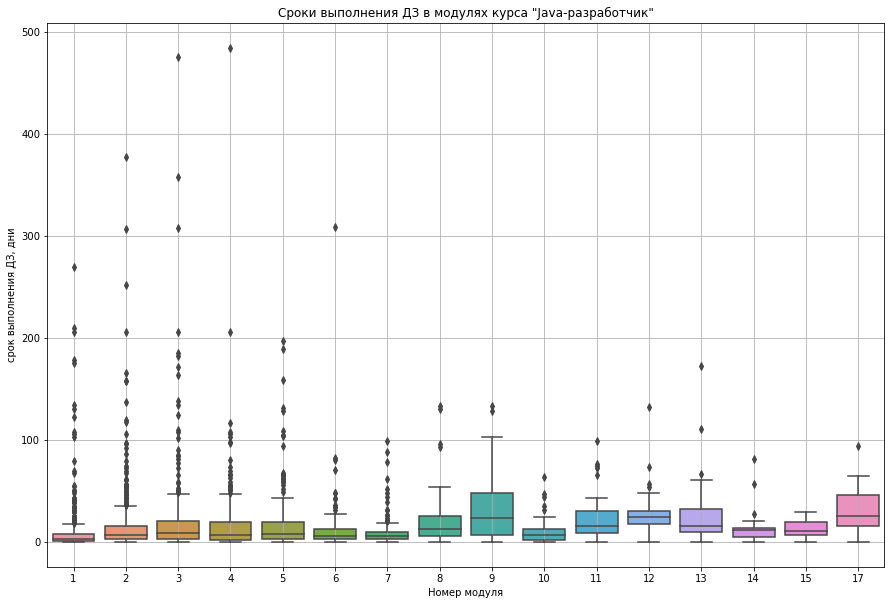

In [55]:
fig, ax = plt.subplots(figsize=(15, 10))

data = module_time_df[module_time_df['course_title'] == 'Java-разработчик']
sns.boxplot(x='module_number'
           , y='hwork_day'
           , data=data)
ax.set_xlabel('Номер модуля')
ax.set_ylabel('срок выполнения ДЗ, дни')
ax.set_title('Сроки выполнения ДЗ в модулях курса "Java-разработчик"')
ax.grid()
plt.show()

Очевидно проблемные те студенты, чье время выполнения ДЗ попадает в выбросы.  

Можно ли оставить в покое остальных? На графике самым сложным можно назвать 9 модуль, в нем 75% студентов выполняют ДЗ в срок до (примерно) 50 дней, а максимальное значение срока выполнения ДЗ превышает 100 дней; разница очень большая.  Максимум на этом графике - это не тот максимум, который мы рассматривали выше, а значение 75% перцентили плюс еще 1.5 межквартильного размаха; но и этот максимум значительно превышает условно-оптимальную медиану.

Поэтому имеет смысл выделять группу студентов, требующих особенного внимания. Сюда будем относить тех, чьи сроки работы над ДЗ превышают верхнюю квартиль, но еще не превышают максимум (не попадают в выбросы).  

И выделяем непосредственно проблемных студентов: "студентов из выбросов" - как особую группу, близкую к тому, чтобы бросить учебу + студентов, у которых есть незавершенные ДЗ.

Проблемные студенты в нашем датафрейме:

In [56]:
def upper(module):
    """
    Определяет максимум boxplot'а
    """
    iqr = module.quantile(0.75) - module.quantile(0.25)
    upper_bound = 1.5 * iqr + module.quantile(0.75)
    return upper_bound

deadline_df = module_time_df.groupby(['course_title', 'module_number'])['hwork_day']\
    .apply(upper)\
    .reset_index()\
    .rename(columns={'hwork_day': 'deadline'})

part1_df = module_time_df.merge(deadline_df, how='left', on=['course_title', 'module_number'])

# выделяем данные по студентам, чье время прохождения модуля является выбросом
part2_df = part1_df[part1_df['hwork_day'] >= part1_df['deadline']]
crisis_time_df = part2_df.merge(progresses_df, how='left', on=['course_id', 'progress_id'])
crisis_time_df.insert(9, 'counter', 1)

# выделяем данные по студентам, которые не выполнили (не завершили) ДЗ
fail_time_df = general_df[(general_df['is_homework'] == True) & (general_df['finish_date'].isnull())]

In [57]:
crisis_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4435 entries, 0 to 4434
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   course_id      4435 non-null   object             
 1   course_title   4435 non-null   object             
 2   module_number  4435 non-null   int64              
 3   progress_id    4435 non-null   object             
 4   start_date     4435 non-null   datetime64[ns, UTC]
 5   finish_date    4435 non-null   datetime64[ns, UTC]
 6   hwork_time     4435 non-null   timedelta64[ns]    
 7   hwork_sec      4435 non-null   float64            
 8   hwork_day      4435 non-null   int64              
 9   counter        4435 non-null   int64              
 10  deadline       4435 non-null   float64            
 11  student_id     4435 non-null   object             
dtypes: datetime64[ns, UTC](2), float64(2), int64(3), object(4), timedelta64[ns](1)
memory usage: 450.4+ KB


Студенты, чье время прохождения модуля является выбросом, по курсам:

In [58]:
crisis_time_df.groupby(['course_title', 'module_number', 'student_id'])['counter'].count()

course_title                   module_number  student_id                      
Excel Базовый                  1              03e87d6358a7d28ca41e63d1c17bc256    1
                                              04256d8a2318fa9f90918f4b3e310473    1
                                              06c5c2a0752b8fe89cf76b3cb7dac347    1
                                              079315883f1464754c2047da57b3b862    1
                                              08c87685f144dc5386e2dd230d29fcbb    1
                                                                                 ..
Руководитель digital-проектов  16             1afbf3c4f650a7eda053ef74c6c02e87    1
                                              3116713ba1faa82bbede521fd0d16b5b    1
                                              39c24ada0df5a542970eb042059c19d8    1
                                              841e163f7898c70a581197cc5dec861f    1
                                              aa60999058ab712153b09abf96663853   

In [59]:
fail_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9553 entries, 3560 to 350673
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   progress_id    9553 non-null   object             
 1   module_number  9553 non-null   int64              
 2   lesson_number  9553 non-null   int64              
 3   status         9553 non-null   object             
 4   start_date     9553 non-null   datetime64[ns, UTC]
 5   finish_date    0 non-null      datetime64[ns, UTC]
 6   student_id     9553 non-null   object             
 7   course_id      9553 non-null   object             
 8   course_title   9553 non-null   object             
 9   course_field   9553 non-null   object             
 10  module_title   9553 non-null   object             
 11  lesson_title   9553 non-null   object             
 12  lesson_token   9553 non-null   object             
 13  is_video       9553 non-null   bool        

Студенты, которые не выполнили (не завершили) ДЗ, по курсам:

In [60]:
fail_time_df.groupby(['course_title', 'module_number', 'student_id'])['counter'].count()

course_title                   module_number  student_id                      
Excel Базовый                  1              0203a4ab8610441e866932fb899ed583    1
                                              0223460c3243f00089d12f5a1ac3b413    1
                                              04b23a353793bcb292e3ec1e1b87a8ef    1
                                              08eb0f62ba99878082290c233c4e097c    1
                                              1150bdf8297efb5b409f4ca634c8fc8b    1
                                                                                 ..
Руководитель digital-проектов  16             5c296b254c1e692e2607939060595b27    1
                                              61879804e9a0a2f0fb16ac0ba0261c98    1
                                              995410decf89a2d9f9415c7c89ca8490    1
                                              bc1106ffe739d61e764d570a3838296f    1
                                              d1121122c6378eeae3e8ab2b57a7fb5c   

In [61]:
gen_problem_df = pd.concat([crisis_time_df, fail_time_df])
gen_problem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13988 entries, 0 to 350673
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   course_id      13988 non-null  object             
 1   course_title   13988 non-null  object             
 2   module_number  13988 non-null  int64              
 3   progress_id    13988 non-null  object             
 4   start_date     13988 non-null  datetime64[ns, UTC]
 5   finish_date    4435 non-null   datetime64[ns, UTC]
 6   hwork_time     4435 non-null   timedelta64[ns]    
 7   hwork_sec      4435 non-null   float64            
 8   hwork_day      4435 non-null   float64            
 9   counter        13988 non-null  int64              
 10  deadline       4435 non-null   float64            
 11  student_id     13988 non-null  object             
 12  lesson_number  9553 non-null   float64            
 13  status         9553 non-null   object        

Посмотрим, сколько всего проблемных студентов и проблемных прогрессов:

In [62]:
gen_problem_df['student_id'].nunique()

7035

In [63]:
gen_problem_df['progress_id'].nunique()

8899

Итого 8899 проблемных progress_id и 7035 проблемных студента. Очевидно, некоторые студенты обучаются больше, чем на одном курсе.  
Проверим:

In [64]:
number_of_course_df = gen_problem_df.groupby(['student_id'])['course_title']\
        .nunique()\
        .reset_index()

several_courses = number_of_course_df[number_of_course_df['course_title'] > 1]
several_courses.describe()

,course_title
count,1276.000000
mean,2.460815
std,0.817956
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,9.000000


1276 студент из числа проблемных обучается больше, чем на одном курсе. В основном это 2 различных курса, но есть довольно странный максимум = 9 курсов. Проверяем:

In [65]:
several_courses[several_courses['course_title'] == 9]

,student_id,course_title
5616,ce87ff48d886feb4127db3609e7a3eaa,9


In [66]:
gen_problem_df[gen_problem_df['student_id'] == 'ce87ff48d886feb4127db3609e7a3eaa']['course_title'].unique()

array(['Анимация интерфейсов', 'Веб-дизайн Базовый', 'Веб-разработчик',
       'Веб-вёрстка для начинающих 2.0',
       'PHP-разработчик с 0 до PRO. Часть 1', 'UX-дизайн',
       'Веб-дизайн с нуля 2.0', 'Веб-дизайн PRO 2.0', 'JavaScript с нуля'],
      dtype=object)

In [67]:
gen_problem_df[gen_problem_df['student_id'] == 'ce87ff48d886feb4127db3609e7a3eaa']

,course_id,course_title,module_number,progress_id,start_date,finish_date,hwork_time,hwork_sec,hwork_day,counter,...,student_id,lesson_number,status,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,start_date_ym
81,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,3,5173cbae288289d84b0378fd4eaff3e6,2018-04-15 14:07:04.510428+00:00,2018-06-13 08:05:36.462648+00:00,58 days 17:58:31.952220,5.075912e+06,58.0,1,...,ce87ff48d886feb4127db3609e7a3eaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,8,5173cbae288289d84b0378fd4eaff3e6,2018-09-01 16:46:02.945190+00:00,2018-12-11 11:52:40.227397+00:00,100 days 19:06:37.282207,8.708797e+06,100.0,1,...,ce87ff48d886feb4127db3609e7a3eaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,12,973aae97d69a54d0783cb947543096c7,2018-08-12 17:45:00.242779+00:00,2018-10-15 12:29:47.062936+00:00,63 days 18:44:46.820157,5.510687e+06,63.0,1,...,ce87ff48d886feb4127db3609e7a3eaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,480d25ad36878fce09e7aada316ba1a6,Веб-разработчик,5,229b59707063186d39d3e09cb26bee2a,2018-04-15 19:40:08.055604+00:00,2018-06-25 15:06:00.267967+00:00,70 days 19:25:52.212363,6.117952e+06,70.0,1,...,ce87ff48d886feb4127db3609e7a3eaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,1,be6ebe70c6002b781b5b46a89cd40eac,2018-08-15 19:01:36.675376+00:00,2018-11-13 09:21:16.359864+00:00,89 days 14:19:39.684488,7.741180e+06,89.0,1,...,ce87ff48d886feb4127db3609e7a3eaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2749,ccbab00e99b27f83369d6cc89d914ad6,PHP-разработчик с 0 до PRO. Часть 1,1,b6ebb8b70d209cc763c53873a644dcc2,2018-11-21 07:12:36.741407+00:00,2018-12-02 14:52:46.425043+00:00,11 days 07:40:09.683636,9.780097e+05,11.0,1,...,ce87ff48d886feb4127db3609e7a3eaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2915,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,2,ee547590a314ad25bafba7a723d63d13,2018-06-07 16:21:21.068516+00:00,2018-08-05 22:38:51.210844+00:00,59 days 06:17:30.142328,5.120250e+06,59.0,1,...,ce87ff48d886feb4127db3609e7a3eaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,3,ee547590a314ad25bafba7a723d63d13,2018-10-22 19:30:07.402192+00:00,2018-12-15 16:37:33.155832+00:00,53 days 21:07:25.753640,4.655246e+06,53.0,1,...,ce87ff48d886feb4127db3609e7a3eaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3088,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,7,ee547590a314ad25bafba7a723d63d13,2019-01-08 18:09:59.752680+00:00,2019-04-05 07:56:10.079967+00:00,86 days 13:46:10.327287,7.479970e+06,86.0,1,...,ce87ff48d886feb4127db3609e7a3eaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3336,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,3,881d589047c86a75e5e6de4c5dedb7a3,2018-10-16 21:09:23.148788+00:00,2018-12-17 11:34:47.937258+00:00,61 days 14:25:24.788470,5.322325e+06,61.0,1,...,ce87ff48d886feb4127db3609e7a3eaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


9 курсов у одного студента, направления Design и Development. Начинаются с апреля 2018 до февраля 2019 - за 10 месяцев студент приобрел 9 образовательных программ. Судя по динамике обучения, некоторые из них явно лишние.

Количество проблемных прогрессов по курсам и модулям:

In [68]:
gen_problem_df.pivot_table(index='course_title'
                            , columns='module_number'
                            , values='progress_id'
                            , aggfunc='nunique')

module_number,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
course_title,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,110.0,62.0,68.0,81.0,59.0,41.0,60.0,44.0,108.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Java-разработчик,114.0,143.0,108.0,77.0,64.0,27.0,32.0,34.0,40.0,14.0,...,25.0,10.0,5.0,5.0,NaN,15.0,NaN,NaN,NaN,NaN
Java-разработчик c нуля,169.0,79.0,71.0,53.0,35.0,25.0,15.0,15.0,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JavaScript с нуля,177.0,154.0,55.0,54.0,49.0,39.0,26.0,21.0,21.0,16.0,...,12.0,10.0,14.0,18.0,20.0,NaN,14.0,NaN,NaN,NaN
PHP-разработчик с 0 до PRO. Часть 1,120.0,138.0,76.0,53.0,28.0,24.0,18.0,33.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMM-маркетолог от А до Я,142.0,86.0,69.0,35.0,11.0,32.0,NaN,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UX-дизайн,281.0,133.0,125.0,122.0,NaN,68.0,75.0,NaN,136.0,NaN,...,NaN,35.0,NaN,NaN,NaN,NaN,NaN,13.0,18.0,NaN
Анимация интерфейсов,100.0,80.0,95.0,48.0,27.0,NaN,33.0,26.0,NaN,9.0,...,3.0,6.0,5.0,6.0,NaN,NaN,7.0,NaN,NaN,11.0
Веб-вёрстка для начинающих 2.0,280.0,261.0,398.0,228.0,129.0,66.0,38.0,33.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Первые три модуля наиболее проблематичные во всех курсах.  
Также выделяются последние модули в курсах "Веб-дизайн с нуля 2.0" (19 модуль) и "Excel Базовый" (9 модуль). 